In [ ]:
asa

# more extraction - low priority

In [2]:
# write a script to extract the motion energy of the pixels inside the nose-jaw-eye delineated rectangle - to include whisker pad but exclude moving lickport

# regression

In [1]:
#Import necessary libraries - should work mostly from BCI_analysis + matplotlib + numpy
import BCI_analysis
from BCI_analysis.pipeline import pipeline_regression
import importlib
importlib.reload(pipeline_regression)
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [2]:
#load multi-session mat files

#multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
multisession_mat_file = os.path.abspath("/home/jupyter/temp/combined_new_old2.mat")
#multisession_mat_file_behavior = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_behavior.mat")
multisession_mat_file_behavior = os.path.abspath("/home/jupyter/temp/combined_behavior.mat")

# print('loading multi-session imaging data...')
# multi_session_data = BCI_analysis.io_matlab.read_multisession_mat_2022(multisession_mat_file)
print('loading multi-session behavior data...')
multi_session_behavior_data = BCI_analysis.io_matlab.read_multisession_behavior_mat(multisession_mat_file_behavior)



loading multi-session behavior data...


In [3]:
# # define base directories, if necessary
# # define subject/FOV/session/
# importlib.reload(BCI_analysis.pipeline_align)
# multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
# dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
# bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
# suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
# sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
# aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
# plt_save_path = os.path.abspath("/home/jupyter/Plots/")

# mouse = "BCI_26"
# FOV = "FOV_04"
# camera = "side"
# session = "041022"


# mouse = "BCI_29"
# FOV = "FOV_02"
# camera = "side"
# session = "042822"

# # match calcium imaging frames with DLC frames, extract all data in a nice structure
# # it doesn't have to have the actual calcium traces, the frame indices are enough, since we'll select the calcium traces in a next step, since probably this cell will be the slowest
# # should have the option for averaging/std calculation on variable windows, then downsampling
# # should have the option for excluding post-reward activity
# dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
#                                                             dlc_base_dir, 
#                                                             bpod_path, 
#                                                             sessionwise_data_path, 
#                                                             aligned_data_path, 
#                                                             mouse=mouse, 
#                                                             FOV=FOV, 
#                                                             camera=camera, 
#                                                             session=session, 
#                                                             sampling='down', 
#                                                             functions = ['diff','diff_signed','mean'],
#                                                             convolve_tau = 0,
#                                                             plot = False,
#                                                             overwrite=True)
# print(dict_aligned.keys())
# DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
# F = np.concatenate(dict_aligned['F_aligned'], axis=1)

In [4]:
multi_session_behavior_data['mouse']

['BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI34',
 'BCI34',
 'BCI34',
 'BCI34',
 None,
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI37',
 'BCI37',
 'BCI37',
 'BCI37']

In [5]:
len(pd.DataFrame())

0

In [3]:
# using data from .mat file 
from oasis.functions import deconvolve
importlib.reload(BCI_analysis)
dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("/home/jupyter/Plots/")

multi_session_dict = {'mouse':[],
                     'session':[],
                      'mat_idx':[],
                     'cn':[],
                     'DLC_aligned':[],
                     'F':[],
                     'trial_end_frames':[]}
needed_subject = 'BCI34'
do_deconvolve = False
for mat_session_index in range(len(multi_session_behavior_data['session'])):
    # if multi_session_behavior_data['mouse'][mat_session_index] != needed_subject:
    #     continue
    try:
        mouse = multi_session_behavior_data['mouse'][mat_session_index][:3]+'_'+multi_session_behavior_data['mouse'][mat_session_index][3:]
        session = multi_session_behavior_data['session'][mat_session_index]
        camera = "side"
        data = {'F':multi_session_behavior_data['df_closedLoop'][mat_session_index].T,
               'trial_start':multi_session_behavior_data['trial_start'][mat_session_index],
               'cn':int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1,
               'si':multi_session_behavior_data['dt_si'][mat_session_index].tolist()}

        if do_deconvolve:
            spikes_matrix= []
            for F_trace in data['F']:
                c, s, b_, g_, lam = deconvolve(F_trace, penalty=1) 
                spikes_matrix.append(s)
            data['F'] = np.asarray(spikes_matrix)


        dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
                                                                    dlc_base_dir, 
                                                                    bpod_path, 
                                                                    sessionwise_data_path, 
                                                                    aligned_data_path, 
                                                                    mouse=mouse, 
                                                                    FOV=None, 
                                                                    camera=camera, 
                                                                    session=session, 
                                                                    sampling='down', 
                                                                    functions = ['diff','diff_signed','mean'],
                                                                    convolve_tau = .7,
                                                                    plot = False,
                                                                    overwrite=False,
                                                                    use_provided_data=True,
                                                                    source_data = data)
        DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
        F = np.concatenate(dict_aligned['F_aligned'], axis=1)

        multi_session_dict['mouse'].append(multi_session_behavior_data['mouse'][mat_session_index])
        multi_session_dict['session'].append(multi_session_behavior_data['session'][mat_session_index])
        multi_session_dict['cn'].append(int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1)
        multi_session_dict['mat_idx'].append(mat_session_index)
        multi_session_dict['DLC_aligned'].append(DLC_aligned)
        multi_session_dict['F'].append(F)
        multi_session_dict['trial_end_frames'].append(dict_aligned['trial_start_indices'])
        #break
        
        
    except:
        print('no luck with session {}'.format(mat_session_index))

print(dict_aligned.keys())



/home/jupyter/Scripts/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062722-dict_aligned-downsampled.npy
Aligned data not found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062822-dict_aligned-downsampled.npy, saving
bpod trials: 92
imaging trials: 39
Since max_frames is all, this function will return a list of F trialwise as all trials have different lengths
39
(168, 622)
no luck with session 1
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062922-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/063022-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/070122-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062722-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062822-dict_aligned-downsampled.npy
File found at 

In [29]:
#create multi-session dlc-aligned
import scipy
zscore_fluorescence = False
session_frame_nums = []
for i,(DLC_aligned_now,F_now) in enumerate(zip(multi_session_dict['DLC_aligned'],multi_session_dict['F'])):
    session_frame_nums.append(F_now.shape[1])
    if zscore_fluorescence:
        F_now = scipy.stats.zscore(F_now,axis = 1)
    for k in DLC_aligned_now.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned_now[k] = DLC_aligned_now[k] - np.nanmean(DLC_aligned_now[k])
    if i == 0:
        DLC_aligned = DLC_aligned_now
        F = F_now
    else:
        DLC_aligned = pd.concat([DLC_aligned, DLC_aligned_now], ignore_index=True)
        F = np.concatenate([F,F_now],1)
    print(DLC_aligned.shape)
    #break


(25197, 108)
(47773, 108)
(70180, 108)
(92363, 108)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 622 and the array at index 1 has size 364

In [227]:
# # moving average of fluorescence
# F_roll = []
# for f in F:
#     F_roll.append(BCI_analysis.plot_utils.rollingfun(f,10,'mean'))
# F_roll = np.asarray(F_roll)
# F = F_roll

(8000.0, 10000.0)

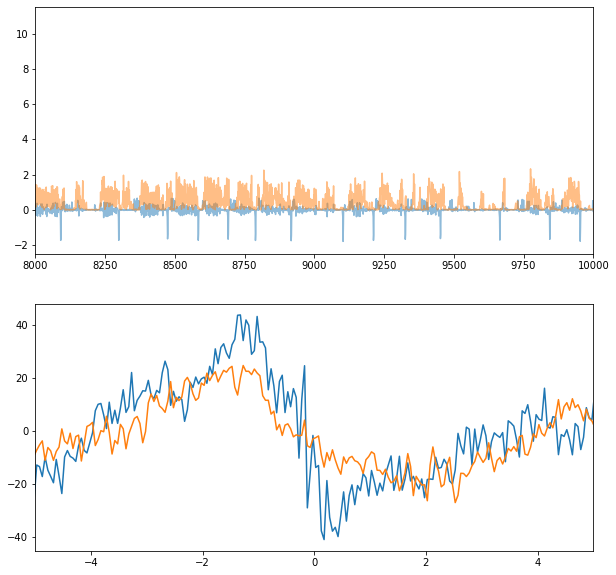

In [163]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
lp = multi_session_dict['DLC_aligned'][0]['Lickport','diff_signed','x'].values.copy()
#lp[lp<0] = 0
jaw = multi_session_dict['DLC_aligned'][0]['Jaw','diff','y']

ax.plot(lp,alpha = .5)
ax.plot(jaw,alpha = .5)
for s,e in zip([0,10000],[5000,15000]):

    
    ax.set_xlim([s,e])
    cc = scipy.signal.correlate(lp[s:e], jaw[s:e], mode='full', method='auto')

    ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
    ax2.set_xlim([-5,5])
ax.set_xlim([8000,10000])

In [7]:
# to do 
# add velocity, convolve with calcium kinetics
# change subject to BCI29 - session with nice learning

import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


In [8]:
for k in DLC_aligned.keys(): # remove eye and likelihood
    if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # remove lickport
    if 'lickport' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
# for k in DLC_aligned.keys(): # remove everything but lickport
#     if ('lickport' not in k[0].lower() and 'pole' not in k[0].lower()) or ('lickport' in k[0].lower() and 'y' == k[2]):
#         DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # normalize data
    DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
    #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))

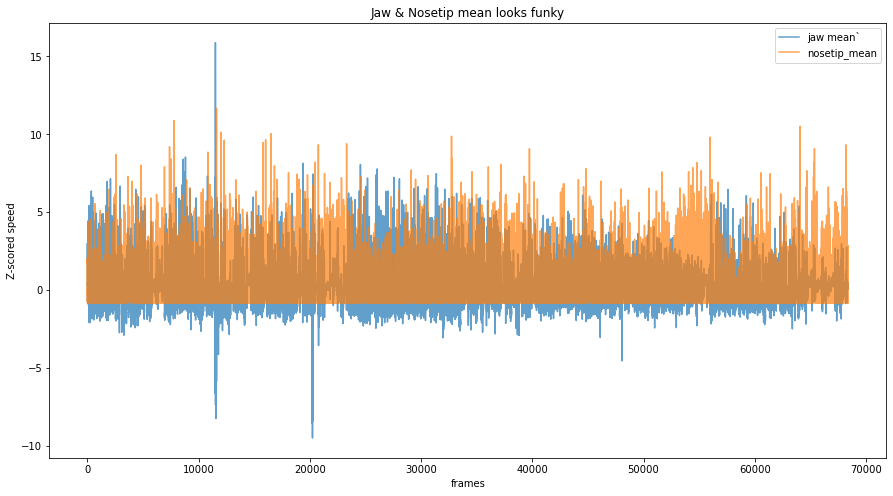

In [165]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Jaw"]['mean']['x'], alpha = .7,label = 'jaw mean`')
ax1.plot(DLC_aligned["NoseTip"]['diff']['x'], alpha = .7,label = 'nosetip_mean')
ax1.set_title('Jaw & Nosetip mean looks funky')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [9]:
#create offsets - 1 second back and forward
offsets = np.arange(-20,25,5)
cols_new = []
for col in DLC_aligned.columns:
    for offset in offsets:
        cols_new.append((col[0],offset,col[1],col[2]))
df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

for k in df2.keys():
    df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
DLC_aligned = df2        

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


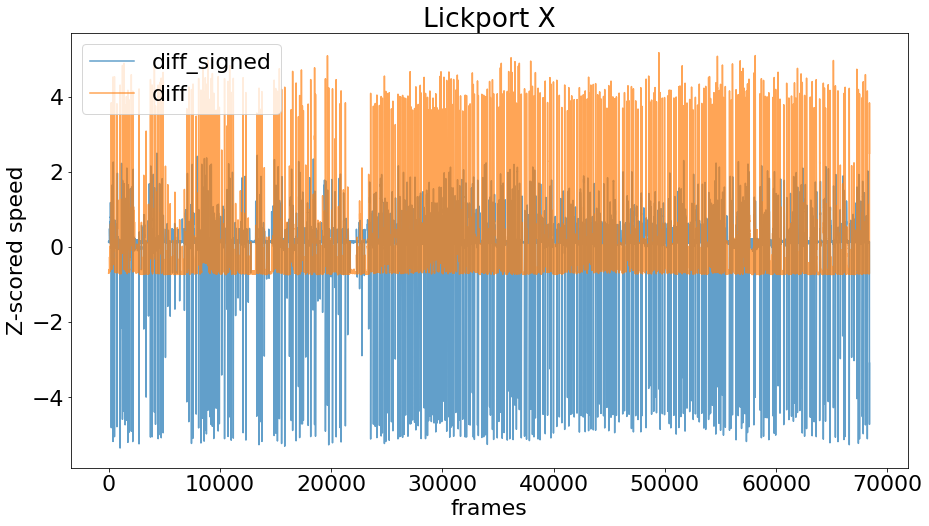

In [41]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Lickport"]['diff_signed']['x'], alpha = .7,label = 'diff_signed')
ax1.plot(DLC_aligned["Lickport"]['diff']['x'], alpha = .7,label = 'diff')
ax1.set_title('Lickport X')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [10]:
scores, beta, intercept = pipeline_regression.linear_regression(F, DLC_aligned)


Calculating regression fit for 364 neurons, May take time


100%|██████████| 364/364 [07:21<00:00,  1.21s/it]


In [11]:
np.argsort(scores)[::-1][:20]

array([  8,  58, 135,   2,  84, 122, 115, 101, 198,  21, 208,  50, 118,
        66,  61, 127, 336, 287,  57, 234])

Text(0.0026181461467687387, 0.044879343890118495, 'neuron 101')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


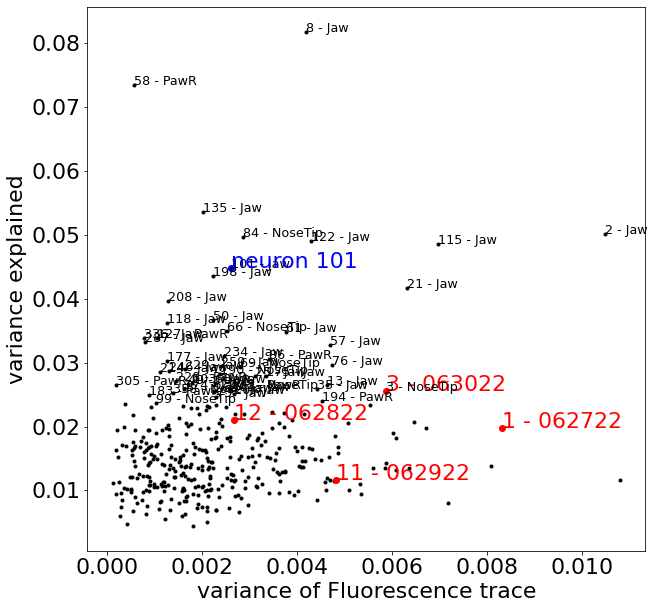

In [12]:
fig = plt.figure(figsize = [10,10])
ax=fig.add_subplot(1,1,1)
ax.plot(np.var(F,1),scores,'k.')
for cn,session in zip(multi_session_dict['cn'],multi_session_dict['session']):
    ax.plot(np.var(F,1)[cn],scores[cn],'ro')
    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,session),color = 'red')
ax.set_xlabel('variance of Fluorescence trace')
ax.set_ylabel('variance explained')
for cn in np.argsort(scores)[::-1][:50]:

    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,DLC_aligned.keys()[np.argsort(np.abs(beta[cn]))[::-1][0]][0]),color = 'black',size = 'xx-small')
cn = 101
ax.plot(np.var(F,1)[cn],scores[cn],'bo')
ax.text(np.var(F,1)[cn],scores[cn],'neuron {}'.format(cn),color = 'blue')

In [13]:
multi_session_dict['cn']

[1, 12, 11, 3]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


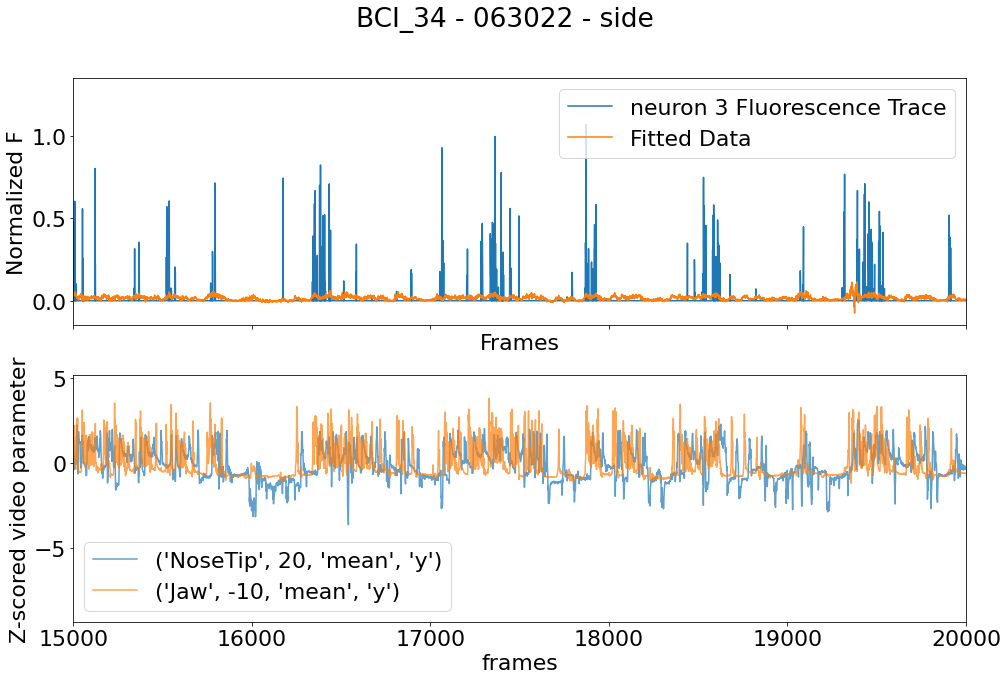

In [14]:
import matplotlib.pyplot as plt
cn = 3#dict_aligned['cn'] #54
def plot_regression(neuron=cn):
    _, axs = plt.subplots(2, 1, figsize=(16,10),sharex=True)
    plt.suptitle(f"{mouse} - {session} - {camera}")# - {FOV}")
    axs[0].plot(F[neuron, :], label=f'neuron {neuron} Fluorescence Trace')
    axs[0].plot((beta[neuron]@DLC_aligned.T) + intercept[neuron], label='Fitted Data')
    #axs[0].plot(F[neuron, :]-((beta[neuron]@DLC_aligned.T) + intercept[neuron]),'k-', label='Difference')
    # ax[0,0].set_title(f'{end-start} timepoints, score {scores[cn]:0.2f}')
    axs[0].set_xlabel("Frames")
    axs[0].set_ylabel("Normalized F")
    axs[0].legend()
    for i in np.argsort(np.abs(beta[neuron]))[::-1][:2]:
        axs[1].plot(DLC_aligned[DLC_aligned.keys()[i]], alpha = .7,label = DLC_aligned.keys()[i])
    # try:
    #     axs[1].plot(DLC_aligned["Lickport"]['diff_signed']['x'][:10000], alpha = .7,label = 'diff_signed')
    #     axs[1].plot(DLC_aligned["Lickport"]['diff']['x'][:10000], alpha = .7,label = 'diff')
    #     axs[1].set_title('Lickport X')
    # except:
    #     try:
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff_signed']['y'][:10000], alpha = .7,label = 'diff_signed')
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff']['y'][:10000], alpha = .7,label = 'diff')
    #         axs[1].set_title('Tongue Y')
    #     except:
    #         pass
    axs[1].set_xlabel('frames')
    axs[1].set_ylabel('Z-scored video parameter')
    axs[1].legend()
    axs[0].set_xlim([15000,20000])
    #plt.plot()
plot_regression(cn)

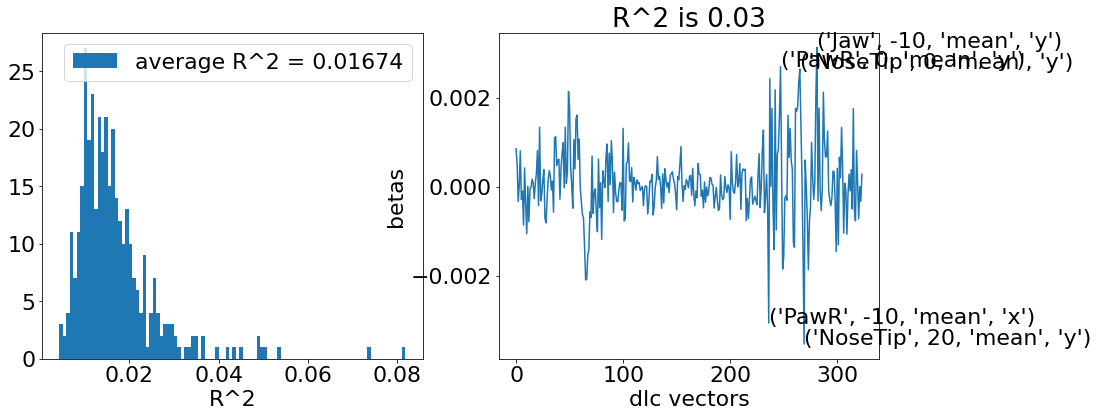

In [15]:

fig = plt.figure(figsize = [15,6])
ax_scores = fig.add_subplot(1,2,1)
ax_scores.hist(scores, bins=100, label=f'average R^2 = {np.mean(scores):0.5f}')
ax_scores.legend()
ax_scores.set_xlabel('R^2')
ax_beta_cn = fig.add_subplot(1,2,2)
ax_beta_cn.plot(beta[cn,:])
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
ax_beta_cn.set_title('R^2 is {}'.format(np.round(scores[cn],2)))
for i in np.argsort(np.abs(beta[cn,:]))[::-1][:5]:
    ax_beta_cn.text(i,beta[cn,i],DLC_aligned.keys()[i])
#plt.show

In [16]:
# offset in time
score_list = []
beta_list = []
offsets = np.arange(-155,155,5)
offsets = np.arange(-20,10,5)
for offset in offsets:
    scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offset,1), DLC_aligned)
    score_list.append(scores_[0])
    beta_list.append(beta_[0])
#plt.plot(offsets/20,score_list)

Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Text(0.5, 1.0, 'betas at optimal offset')

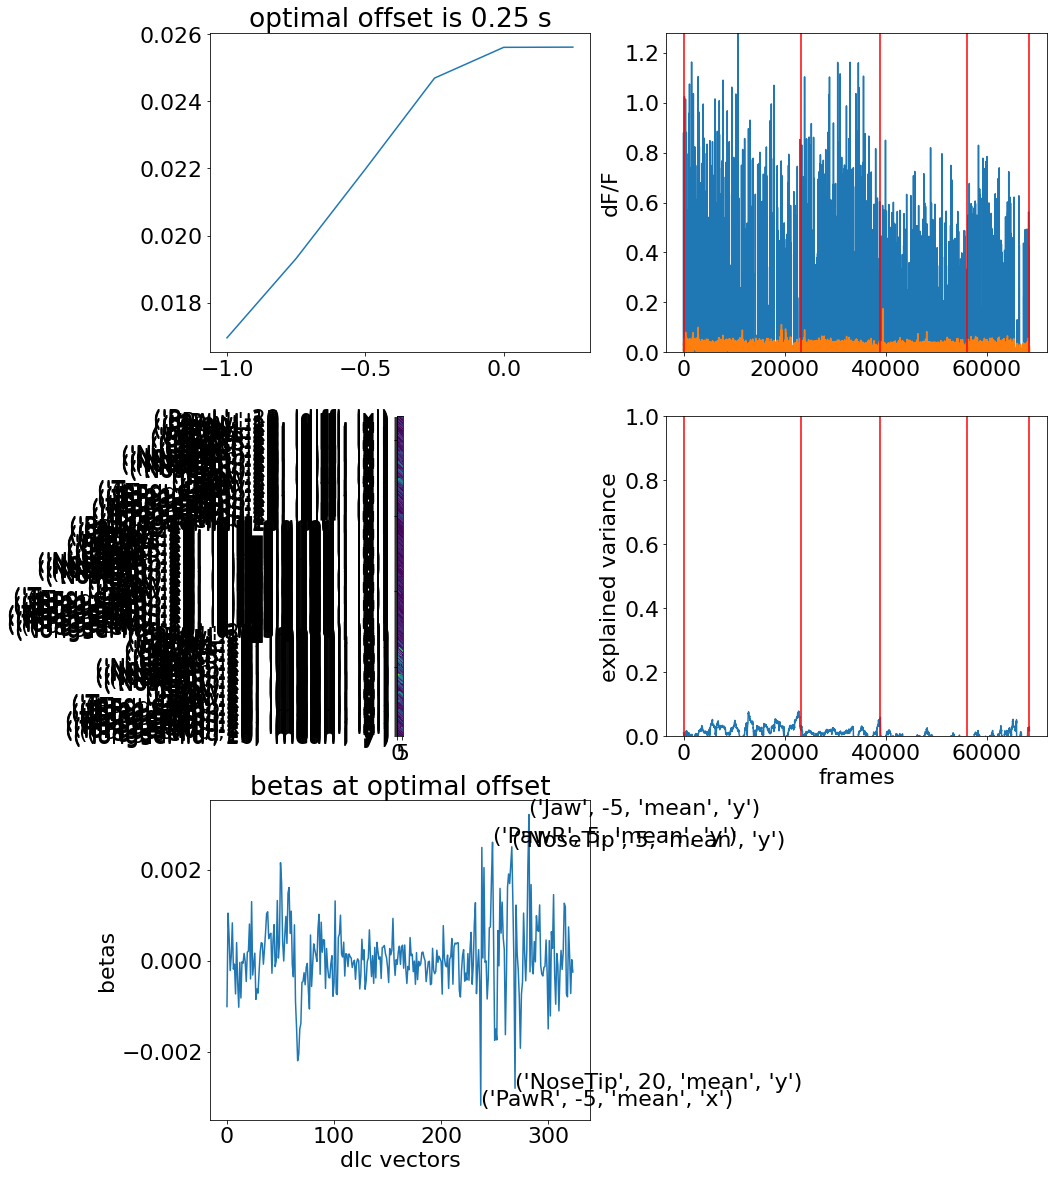

In [17]:
fig = plt.figure(figsize = [15,20])
ax1= fig.add_subplot(3,2,1)
ax2= fig.add_subplot(3,2,3)
ax1.plot(offsets/20,score_list)
ax1.set_title('optimal offset is {} s'.format(offsets[np.argmax(score_list)]/20))
beta_array = np.abs(np.asarray(beta_list).squeeze().T)
# beta_array = beta_array - np.min(beta_array,1)[:,np.newaxis]
# beta_array = beta_array / np.max(beta_array,1)[:,np.newaxis]
ax2.imshow(beta_array)
# ticks =np.arange(0,33,5)
# ax2.set_xticks(ticks)
# ax2.set_xticklabels(offsets[ticks]/20)
# ax2.set_xticklabels(offsets[ticks]/20)
ax2.set_yticks(np.arange(0,len(DLC_aligned.keys()),1))
ax2.set_yticklabels(DLC_aligned.keys())
ax3 = fig.add_subplot(3,2,2)
    
ax3.plot(F[cn, :], label=f'neuron {cn} Flourescence Trace')
scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offsets[np.argmax(score_list)],1), DLC_aligned)
scores_ = scores_[0]
beta_ = beta_[0]
intercept_ = intercept_[0]
ax3.plot((beta_@DLC_aligned.T.values) + intercept_, label='Fitted Data')
#ax3.set_xlim([0,10000])
ax3.set_ylim([np.min(F[cn, :]),np.max(F[cn, :])])
ax3.set_ylabel('dF/F')
ax3.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax3.get_ylim()[0],ymax = ax3.get_ylim()[1],color = 'red')
var_win = 1000
original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
nonexplained_variance = np.abs(residual_variance)/original_variance

ax_diff = fig.add_subplot(3,2,4,sharex = ax3)
#ax_diff.plot((original_variance-residual_variance)/original_variance,'k-')
#ax_diff.plot(original_variance)
ax_diff.plot(1-nonexplained_variance)
ax_diff.set_ylim([0,1])
ax_diff.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax_diff.get_ylim()[0],ymax = ax_diff.get_ylim()[1],color = 'red')

ax_diff.set_xlabel('frames')
ax_diff.set_ylabel('explained variance')
#ax_diff.plot(residual_variance)
ax_beta_cn = fig.add_subplot(3,2,5)
ax_beta_cn.plot(beta_)
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
for i in np.argsort(np.abs(beta_))[::-1][:5]:
    ax_beta_cn.text(i,beta_[i],DLC_aligned.keys()[i])
ax_beta_cn.set_title('betas at optimal offset')

(26091, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 80.37it/s]


(26276, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.90it/s]


(25516, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.76it/s]


(25993, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.28it/s]


(26243, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 85.13it/s]


(26296, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.17it/s]


(25297, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.17it/s]


(26017, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.26it/s]


(25486, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.90it/s]


(25514, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.47it/s]


(26401, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.48it/s]


(26894, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.36it/s]


(26727, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.20it/s]


(26090, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.98it/s]


(26235, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.25it/s]


(26111, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.56it/s]


(26987, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.72it/s]


(26796, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.03it/s]


(25549, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.26it/s]


(25797, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 85.93it/s]


(26226, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.83it/s]


(25825, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.72it/s]


(25165, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.38it/s]


(25396, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.72it/s]


(26007, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.09it/s]


(26692, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.46it/s]


(26051, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.86it/s]


(26401, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.39it/s]


(26220, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.01it/s]


(26100, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.26it/s]


(25935, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 79.17it/s]


(26309, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.37it/s]


(25239, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.35it/s]


(26579, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.77it/s]


(26332, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.83it/s]


(26389, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.64it/s]


(26805, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 79.11it/s]


(26098, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.03it/s]


(25415, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.69it/s]


(25380, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.32it/s]


(27033, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.69it/s]


(26332, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.30it/s]


(26331, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.89it/s]


(26362, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.39it/s]


(25826, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.46it/s]


(26308, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.98it/s]


(24993, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.41it/s]


(24963, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.27it/s]


(26453, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.93it/s]


(26420, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.34it/s]


(25763, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.35it/s]


(26185, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.56it/s]


(25561, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.05it/s]


(25467, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.11it/s]


(26441, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.15it/s]


(25276, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.99it/s]


(25869, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.12it/s]


(27121, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.86it/s]


(26391, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.91it/s]


(25505, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.39it/s]


(26899, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.08it/s]


(25690, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.21it/s]


(26451, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.16it/s]


(25542, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.10it/s]


(25634, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.69it/s]


(26299, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.83it/s]


(25364, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.13it/s]


(26141, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.05it/s]


(25937, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.27it/s]


(25622, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.67it/s]


(25580, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.52it/s]


(26555, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 84.02it/s]


(25843, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.59it/s]


(25795, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.07it/s]


(25908, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 84.97it/s]


(26106, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.25it/s]


(24481, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.23it/s]


(25569, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.94it/s]


(26192, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 82.78it/s]


(25765, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.39it/s]


(26269, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.16it/s]


(26319, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.43it/s]


(25994, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.76it/s]


(26393, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.70it/s]


(25800, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.99it/s]


(25854, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.71it/s]


(25981, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.12it/s]


(26148, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.95it/s]


(26012, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.48it/s]


(25474, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.93it/s]


(25407, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.97it/s]


(26684, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.78it/s]


(24483, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 82.30it/s]


(26421, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.31it/s]


(26460, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.26it/s]


(25423, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.06it/s]


(26169, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.33it/s]


(25773, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.93it/s]


(26411, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.74it/s]


(25690, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.41it/s]


(22293, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.24it/s]


(22751, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.48it/s]


(22790, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.38it/s]


(21279, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.10it/s]


(22404, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.87it/s]


(22179, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.43it/s]


(21986, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.48it/s]


(22680, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.40it/s]


(22825, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.26it/s]


(23594, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.89it/s]


(23791, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.31it/s]


(22628, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.55it/s]


(22891, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.18it/s]


(23807, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.07it/s]


(22836, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


(22908, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.88it/s]


(22546, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.60it/s]


(23395, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.96it/s]


(23772, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.72it/s]


(24439, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.08it/s]


(23353, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.64it/s]


(23376, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.49it/s]


(21559, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.04it/s]


(23859, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.14it/s]


(22829, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.24it/s]


(23446, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.61it/s]


(22557, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.25it/s]


(22031, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.95it/s]


(22750, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.46it/s]


(23408, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.68it/s]


(22163, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.94it/s]


(22449, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.61it/s]


(22954, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.30it/s]


(23317, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.03it/s]


(23232, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.56it/s]


(22637, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.93it/s]


(23243, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.12it/s]


(23026, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.76it/s]


(21203, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.04it/s]


(22659, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.54it/s]


(23553, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.01it/s]


(23393, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.35it/s]


(23342, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.53it/s]


(24435, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.86it/s]


(23091, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.20it/s]


(22191, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.46it/s]


(24884, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.49it/s]


(23128, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.76it/s]


(21524, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.29it/s]


(22913, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.31it/s]


(22857, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.13it/s]


(21912, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.97it/s]


(23654, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.02it/s]


(22650, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.77it/s]


(23779, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.43it/s]


(22834, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.94it/s]


(22122, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.88it/s]


(23199, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.95it/s]


(23104, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.35it/s]


(23272, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.91it/s]


(22549, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.53it/s]


(24332, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.90it/s]


(23469, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.12it/s]


(23164, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.67it/s]


(24113, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.41it/s]


(23415, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.83it/s]


(22990, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.10it/s]


(23664, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 78.24it/s]


(22681, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.96it/s]


(22710, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.20it/s]


(23327, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.98it/s]


(23065, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.51it/s]


(22354, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.63it/s]


(22652, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.32it/s]


(22960, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.48it/s]


(23366, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.14it/s]


(22779, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.56it/s]


(22839, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.08it/s]


(23089, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.44it/s]


(23272, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.15it/s]


(23886, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.33it/s]


(22901, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.64it/s]


(22623, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.46it/s]


(22380, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.15it/s]


(23153, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.81it/s]


(22349, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 84.49it/s]


(22593, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.10it/s]


(22917, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.75it/s]


(22670, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.84it/s]


(23722, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.26it/s]


(23631, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.84it/s]


(22234, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.42it/s]


(23686, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.19it/s]


(23799, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.09it/s]


(23642, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.07it/s]


(24424, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.13it/s]


(24417, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.36it/s]


(23022, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.81it/s]


(21880, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.29it/s]


(23818, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.51it/s]


(21380, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.05it/s]


(21621, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.14it/s]


(20939, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.68it/s]


(20133, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.30it/s]


(22070, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.85it/s]


(19577, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.40it/s]


(21517, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 39.93it/s]


(21522, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.44it/s]


(20886, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 82.71it/s]


(20572, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.78it/s]


(21400, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.63it/s]


(21459, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.88it/s]


(21561, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.37it/s]


(20333, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.79it/s]


(21720, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.85it/s]


(21144, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.84it/s]


(21412, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.36it/s]


(21551, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.31it/s]


(19919, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.91it/s]


(21416, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.07it/s]


(20853, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.68it/s]


(21983, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.11it/s]


(21956, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.72it/s]


(21124, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.65it/s]


(21444, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.48it/s]


(20581, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.95it/s]


(22898, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.55it/s]


(19899, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.70it/s]


(20780, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.09it/s]


(22305, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.51it/s]


(21004, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.20it/s]


(20821, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.30it/s]


(19945, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 85.31it/s]


(22499, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.59it/s]


(21387, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.64it/s]


(19310, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 84.42it/s]


(20763, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.86it/s]


(21795, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.82it/s]


(21696, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.28it/s]


(21490, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 91.90it/s]


(21477, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.15it/s]


(20891, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.08it/s]


(21305, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.44it/s]


(21098, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.11it/s]


(22149, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.25it/s]


(21168, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.38it/s]


(21741, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.01it/s]


(21669, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.24it/s]


(21632, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.65it/s]


(20556, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.61it/s]


(22893, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.36it/s]


(20427, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.84it/s]


(21622, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.81it/s]


(22492, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.11it/s]


(21400, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.15it/s]


(21996, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.58it/s]


(20439, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.29it/s]


(20842, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.25it/s]


(20491, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.95it/s]


(21075, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 83.06it/s]


(21663, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.86it/s]


(21647, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.77it/s]


(20973, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.41it/s]


(20845, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.85it/s]


(21180, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.88it/s]


(22148, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.54it/s]


(21208, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.52it/s]


(21621, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.22it/s]


(20323, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.48it/s]


(21453, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.68it/s]


(21127, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.72it/s]


(21334, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.40it/s]


(21109, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.86it/s]


(21028, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.55it/s]


(20954, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.85it/s]


(21225, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.48it/s]


(22413, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.35it/s]


(21144, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.01it/s]


(20533, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.54it/s]


(23158, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.13it/s]


(20641, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.67it/s]


(20706, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.22it/s]


(20731, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.09it/s]


(21590, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.79it/s]


(21793, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.48it/s]


(21220, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.29it/s]


(21126, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.77it/s]


(21834, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.45it/s]


(20392, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.60it/s]


(20769, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.91it/s]


(21513, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.74it/s]


(20004, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.05it/s]


(21279, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.20it/s]


(22078, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.94it/s]


(20897, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.49it/s]


(21683, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.05it/s]


(21286, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.98it/s]


(22419, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.73it/s]


(22701, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.36it/s]


(22529, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.98it/s]


(21763, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.13it/s]


(21475, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.55it/s]


(21233, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.99it/s]


(20923, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.66it/s]


(20673, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.63it/s]


(20612, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.07it/s]


(20900, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.18it/s]


(21257, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.89it/s]


(21242, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.65it/s]


(21703, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.33it/s]


(21031, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.81it/s]


(21381, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.89it/s]


(21318, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.68it/s]


(21637, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.89it/s]


(21193, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.70it/s]


(21365, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.85it/s]


(21583, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.42it/s]


(21682, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.61it/s]


(20773, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.35it/s]


(20611, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.76it/s]


(21228, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.32it/s]


(21369, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.29it/s]


(21009, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.14it/s]


(20847, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.77it/s]


(21590, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.34it/s]


(20698, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.44it/s]


(20712, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.92it/s]


(20207, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.18it/s]


(21975, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.29it/s]


(20953, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.56it/s]


(20882, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.38it/s]


(21278, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.04it/s]


(20535, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.57it/s]


(21338, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.42it/s]


(21432, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.58it/s]


(21256, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.79it/s]


(21607, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.66it/s]


(21483, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.28it/s]


(20442, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.26it/s]


(21350, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.37it/s]


(21304, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.51it/s]


(20981, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.92it/s]


(21709, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.69it/s]


(21624, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.01it/s]


(22137, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.95it/s]


(20540, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.30it/s]


(21301, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.14it/s]


(21076, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.40it/s]


(20935, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.62it/s]


(21425, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.51it/s]


(20986, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.27it/s]


(20114, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.13it/s]


(20637, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.78it/s]


(20907, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.44it/s]


(20564, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.13it/s]


(21285, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.17it/s]


(20511, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.60it/s]


(21285, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 48.86it/s]


(21239, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.36it/s]


(21256, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.19it/s]


(21339, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.61it/s]


(21269, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.26it/s]


(21261, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.96it/s]


(20584, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.39it/s]


(20079, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.54it/s]


(21212, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.91it/s]


(20111, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.17it/s]


(20693, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.25it/s]


(21447, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.21it/s]


(21473, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.09it/s]


(21079, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.41it/s]


(21673, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.63it/s]


(20970, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.86it/s]


(21151, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.90it/s]


(21027, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.38it/s]


(21340, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.69it/s]


(21164, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.25it/s]


(21547, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.87it/s]


(20816, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.72it/s]


(20385, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.22it/s]


(21184, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.42it/s]


(21031, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 46.15it/s]


(21866, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.10it/s]


(21474, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.37it/s]


(21622, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.06it/s]


(21684, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.22it/s]


(21783, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.01it/s]


(21046, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.59it/s]


(21154, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.06it/s]


(21068, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.71it/s]


(21223, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.83it/s]


(22158, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.00it/s]


(21455, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.51it/s]


(21247, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.11it/s]


(21748, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.54it/s]


(22242, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.67it/s]


(20890, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.85it/s]


(20889, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.80it/s]


(20703, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.37it/s]


(21625, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.96it/s]


(16835, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.67it/s]


(16427, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.49it/s]


(17233, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.55it/s]


(17198, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.99it/s]


(16642, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.01it/s]


(17028, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.36it/s]


(16948, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.76it/s]


(17959, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.96it/s]


(17306, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.10it/s]


(17036, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.87it/s]


(16900, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


(17088, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.36it/s]


(17670, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.72it/s]


(17289, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.75it/s]


(17518, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.64it/s]


(16890, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.04it/s]


(16666, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.07it/s]


(16926, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.65it/s]


(16674, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.87it/s]


(16819, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.07it/s]


(17395, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.26it/s]


(17079, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.53it/s]


(17487, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.72it/s]


(16579, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.44it/s]


(16959, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.86it/s]


(17176, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.13it/s]


(16827, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.30it/s]


(16739, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.73it/s]


(16722, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.06it/s]


(16658, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.10it/s]


(17106, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.33it/s]


(16248, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 80.70it/s]


(17805, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 124.35it/s]


(17142, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.88it/s]


(17980, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.16it/s]


(16950, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.46it/s]


(17805, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.57it/s]


(16649, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.81it/s]


(17077, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.62it/s]


(17177, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 115.42it/s]


(17094, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.88it/s]


(17042, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.78it/s]


(16678, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.06it/s]


(17096, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.04it/s]


(16839, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.87it/s]


(16950, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.14it/s]


(17161, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.35it/s]


(16313, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.08it/s]


(16691, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.50it/s]


(16911, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.84it/s]


(16835, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.30it/s]


(16741, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.54it/s]


(16759, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.27it/s]


(16851, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.97it/s]


(17084, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.58it/s]


(17023, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.51it/s]


(17965, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.11it/s]


(16135, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.88it/s]


(16334, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.37it/s]


(17746, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.18it/s]


(17315, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.42it/s]


(17439, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.29it/s]


(17004, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.99it/s]


(16953, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.33it/s]


(17039, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.23it/s]


(18280, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.01it/s]


(16888, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.99it/s]


(18226, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 71.13it/s]


(17406, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.59it/s]


(16888, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.93it/s]


(17799, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.56it/s]


(17367, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.18it/s]


(16400, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.96it/s]


(16686, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.94it/s]


(16426, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.58it/s]


(16519, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.90it/s]


(17389, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.54it/s]


(17192, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.76it/s]


(17043, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.78it/s]


(17592, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.02it/s]


(17469, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.09it/s]


(17701, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.15it/s]


(16754, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 118.81it/s]


(16509, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.48it/s]


(16930, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 112.87it/s]


(17748, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.72it/s]


(16957, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.93it/s]


(16395, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.32it/s]


(17670, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 125.53it/s]


(17501, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.33it/s]


(16327, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.50it/s]


(17133, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.05it/s]


(16633, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.05it/s]


(16545, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.75it/s]


(16781, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.20it/s]


(17631, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.35it/s]


(16415, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.82it/s]


(16777, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.39it/s]


(16284, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.30it/s]


(17138, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.42it/s]


(17565, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.76it/s]


(16843, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.89it/s]


(17917, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.11it/s]


(17700, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.25it/s]


(17765, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.19it/s]


(16744, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.67it/s]


(17582, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.25it/s]


(17304, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.44it/s]


(17777, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.60it/s]


(18018, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.44it/s]


(17108, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.70it/s]


(17589, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.63it/s]


(17335, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.93it/s]


(17116, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.13it/s]


(18140, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.54it/s]


(16736, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.01it/s]


(17541, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.85it/s]


(17187, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.68it/s]


(17519, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.85it/s]


(17371, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.95it/s]


(17728, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 119.13it/s]


(17844, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.16it/s]


(18196, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.62it/s]


(17001, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 42.41it/s]


(18163, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.18it/s]


(17402, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.50it/s]


(17827, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.41it/s]


(17092, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.71it/s]


(18018, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.81it/s]


(17512, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.94it/s]


(18060, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.05it/s]


(17494, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.69it/s]


(17055, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.61it/s]


(17715, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.74it/s]


(17056, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.52it/s]


(17874, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.38it/s]


(17392, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.14it/s]


(17681, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.44it/s]


(17847, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.40it/s]


(18127, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.74it/s]


(17552, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.19it/s]


(17854, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.65it/s]


(17870, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 113.30it/s]


(17558, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.36it/s]


(17826, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.31it/s]


(17584, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.20it/s]


(17620, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.64it/s]


(17425, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.56it/s]


(17486, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.78it/s]


(17171, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.82it/s]


(16940, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.71it/s]


(17949, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.31it/s]


(17652, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.38it/s]


(16719, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.57it/s]


(17267, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.56it/s]


(17366, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.56it/s]


(17816, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.76it/s]


(17795, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.11it/s]


(17733, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.40it/s]


(17051, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.43it/s]


(17246, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.33it/s]


(17187, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.83it/s]


(17801, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.64it/s]


(17917, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.93it/s]


(17971, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.09it/s]


(16949, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.43it/s]


(17417, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.12it/s]


(18264, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.39it/s]


(17656, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.50it/s]


(17287, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.83it/s]


(17276, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.55it/s]


(17714, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.63it/s]


(17960, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.50it/s]


(18295, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.35it/s]


(17501, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.13it/s]


(17236, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.11it/s]


(16985, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.72it/s]


(17828, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.52it/s]


(17350, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.62it/s]


(16288, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.55it/s]


(17768, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.06it/s]


(17504, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.07it/s]


(18106, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.47it/s]


(17491, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.18it/s]


(17444, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.82it/s]


(17172, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.43it/s]


(17150, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.02it/s]


(18341, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.65it/s]


(16723, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.15it/s]


(18537, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.40it/s]


(16968, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.65it/s]


(17753, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.72it/s]


(17105, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.35it/s]


(16416, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.47it/s]


(17362, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.74it/s]


(17794, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.37it/s]


(16908, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.50it/s]


(17150, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.53it/s]


(17235, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.05it/s]


(18079, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.48it/s]


(32446, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.61it/s]


(32604, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.92it/s]


(32445, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 50.45it/s]


(32374, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 50.23it/s]


(32134, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.30it/s]


(32855, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.68it/s]


(32830, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.55it/s]


(32858, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 45.93it/s]


(32726, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.05it/s]


(32726, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.75it/s]


(32365, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.75it/s]


(32462, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.07it/s]


(32811, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.19it/s]


(32416, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.31it/s]


(32590, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.19it/s]


(32192, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.27it/s]


(32011, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.74it/s]


(32303, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.77it/s]


(32719, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.70it/s]


(32075, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.90it/s]


(32605, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.64it/s]


(32996, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 41.96it/s]


(32116, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.00it/s]


(32922, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.17it/s]


(32299, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.59it/s]


(32536, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 48.69it/s]


(32605, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.75it/s]


(32590, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.85it/s]


(32790, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.98it/s]


(32380, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.78it/s]


(32519, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.15it/s]


(32123, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.66it/s]


(32619, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.31it/s]


(32294, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 49.77it/s]


(32876, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.55it/s]


(32053, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.23it/s]


(32394, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.86it/s]


(32452, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.36it/s]


(32104, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.02it/s]


(32641, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.75it/s]


(32657, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.88it/s]


(32393, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 74.10it/s]


(32319, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.22it/s]


(32124, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.49it/s]


(32680, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.44it/s]


(32840, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.06it/s]


(32621, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.90it/s]


(33112, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.60it/s]


(32515, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.81it/s]


(32345, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.11it/s]


(33077, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.26it/s]


(32352, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.15it/s]


(32884, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 48.62it/s]


(33115, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.07it/s]


(32490, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.03it/s]


(32434, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.84it/s]


(32115, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.61it/s]


(32054, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.98it/s]


(32634, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.71it/s]


(32298, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.58it/s]


(32833, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.40it/s]


(32645, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.02it/s]


(33217, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.28it/s]


(32505, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.15it/s]


(32811, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.45it/s]


(32451, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.53it/s]


(32799, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.29it/s]


(32878, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.59it/s]


(32628, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.25it/s]


(32059, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.23it/s]


(32463, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.47it/s]


(32163, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.88it/s]


(32577, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.47it/s]


(33058, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.54it/s]


(32561, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.84it/s]


(32578, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.26it/s]


(32699, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.15it/s]


(32512, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.28it/s]


(32310, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 46.07it/s]


(32906, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.13it/s]


(32880, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.57it/s]


(32768, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.49it/s]


(32815, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.05it/s]


(32216, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 50.92it/s]


(31971, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.94it/s]


(32380, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.14it/s]


(32586, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.74it/s]


(31831, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 49.83it/s]


(32634, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.86it/s]


(32846, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.00it/s]


(32261, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 50.02it/s]


(32481, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 49.70it/s]


(32320, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.54it/s]


(32301, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.02it/s]


(32596, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.49it/s]


(32538, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.25it/s]


(32352, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.93it/s]


(32546, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.94it/s]


(32226, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.63it/s]


(32919, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.28it/s]


(16901, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.42it/s]


(15626, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.88it/s]


(18456, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.08it/s]


(16484, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.17it/s]


(17511, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.61it/s]


(17006, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.81it/s]


(15738, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.16it/s]


(17713, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.49it/s]


(16361, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 118.73it/s]


(17307, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.71it/s]


(18013, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.03it/s]


(17601, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.19it/s]


(16006, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.11it/s]


(17023, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.99it/s]


(16471, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.97it/s]


(17056, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.27it/s]


(16412, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.28it/s]


(15496, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.14it/s]


(16124, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.62it/s]


(18112, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.44it/s]


(17736, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.53it/s]


(16231, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.94it/s]


(16710, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.15it/s]


(16851, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.70it/s]


(17035, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.25it/s]


(17394, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.53it/s]


(15276, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 36.70it/s]


(16424, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.60it/s]


(15980, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.86it/s]


(16730, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.89it/s]


(17384, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.39it/s]


(17325, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.61it/s]


(16512, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.79it/s]


(17312, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.45it/s]


(17622, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.13it/s]


(16929, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.32it/s]


(16206, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.29it/s]


(16160, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.71it/s]


(16147, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.32it/s]


(17405, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.87it/s]


(17469, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.94it/s]


(17302, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.67it/s]


(16756, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.51it/s]


(16700, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.53it/s]


(16508, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.07it/s]


(17486, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.64it/s]


(17130, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.17it/s]


(17816, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.53it/s]


(16577, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.72it/s]


(17649, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.31it/s]


(17645, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.30it/s]


(17853, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.34it/s]


(16211, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.49it/s]


(16840, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.43it/s]


(17257, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.29it/s]


(16953, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.14it/s]


(16604, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.37it/s]


(16424, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.05it/s]


(15699, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.29it/s]


(16433, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.57it/s]


(15771, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.27it/s]


(16661, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.71it/s]


(16790, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.13it/s]


(15686, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.41it/s]


(15984, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.30it/s]


(17035, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.19it/s]


(17626, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.96it/s]


(17180, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.70it/s]


(16612, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.23it/s]


(19071, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.89it/s]


(16961, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.99it/s]


(16568, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.39it/s]


(17011, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.58it/s]


(16176, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.53it/s]


(17296, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.87it/s]


(16920, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.00it/s]


(17628, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.68it/s]


(17454, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.02it/s]


(16813, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.61it/s]


(17235, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.61it/s]


(16596, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.18it/s]


(17069, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.91it/s]


(16245, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.75it/s]


(17043, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.94it/s]


(16808, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.35it/s]


(16599, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.85it/s]


(17209, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.94it/s]


(16631, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.88it/s]


(17382, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.14it/s]


(15998, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.97it/s]


(17607, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.14it/s]


(17254, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.38it/s]


(16709, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.10it/s]


(18309, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 115.58it/s]


(16880, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.54it/s]


(16679, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.61it/s]


(15912, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.77it/s]


(16784, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.89it/s]


(17358, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.35it/s]


(16807, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.79it/s]


(18221, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.23it/s]


(18160, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.18it/s]


(18113, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.12it/s]


(17762, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.67it/s]


(18501, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.48it/s]


(16836, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.19it/s]


(19372, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 116.82it/s]


(18030, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.13it/s]


(17968, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.41it/s]


(18372, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.27it/s]


(17970, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.36it/s]


(18608, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.22it/s]


(19027, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.58it/s]


(18689, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.52it/s]


(19162, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.80it/s]


(18087, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.91it/s]


(19300, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.92it/s]


(18816, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.19it/s]


(17851, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.52it/s]


(17512, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.49it/s]


(17676, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.59it/s]


(18743, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.53it/s]


(18412, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.34it/s]


(19463, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.44it/s]


(16897, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.08it/s]


(19025, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.34it/s]


(19018, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.75it/s]


(19325, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.39it/s]


(18530, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.28it/s]


(19148, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.39it/s]


(18988, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.61it/s]


(17218, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.03it/s]


(19096, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.80it/s]


(18527, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.37it/s]


(18613, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.73it/s]


(18355, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.52it/s]


(19279, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.68it/s]


(18734, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.63it/s]


(19776, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.91it/s]


(18133, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.96it/s]


(18621, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.59it/s]


(18048, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.53it/s]


(19155, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.99it/s]


(18337, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.69it/s]


(19060, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.13it/s]


(19155, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.95it/s]


(17421, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.41it/s]


(17883, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.04it/s]


(19120, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.47it/s]


(18660, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.42it/s]


(18428, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.41it/s]


(18034, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.21it/s]


(17103, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.82it/s]


(18293, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.09it/s]


(17915, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.16it/s]


(18594, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.71it/s]


(17203, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.78it/s]


(18160, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.62it/s]


(18934, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.60it/s]


(18480, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.70it/s]


(18266, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.42it/s]


(17906, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


(17861, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.60it/s]


(18330, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.23it/s]


(18876, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.12it/s]


(19006, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.48it/s]


(19572, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.57it/s]


(18299, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.28it/s]


(17591, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.14it/s]


(18485, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.58it/s]


(18937, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.95it/s]


(19043, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.23it/s]


(18122, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.99it/s]


(18302, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.19it/s]


(18167, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.37it/s]


(19667, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 70.58it/s]


(19172, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.29it/s]


(18136, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.07it/s]


(18331, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.37it/s]


(18086, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.58it/s]


(17871, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.27it/s]


(17469, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.56it/s]


(19082, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.55it/s]


(18296, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.80it/s]


(18961, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.19it/s]


(18419, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.77it/s]


(19137, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 40.64it/s]


(19318, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 69.07it/s]


(18199, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.82it/s]


(19689, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 68.47it/s]


(17898, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.09it/s]


(17583, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.88it/s]


(17750, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.07it/s]


(19265, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.65it/s]


(17883, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.47it/s]


(19482, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.69it/s]


(18604, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.33it/s]


(17958, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.93it/s]


(19065, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.33it/s]


(19326, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.28it/s]


(20626, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.63it/s]


(20514, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.59it/s]


(20421, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.89it/s]


(20744, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.19it/s]


(20016, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.39it/s]


(20569, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.64it/s]


(21409, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.39it/s]


(20846, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.32it/s]


(20348, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.95it/s]


(20055, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 51.94it/s]


(19743, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.88it/s]


(20777, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.10it/s]


(21118, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.61it/s]


(20141, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.17it/s]


(20503, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.65it/s]


(19878, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.23it/s]


(20134, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.67it/s]


(20613, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.25it/s]


(20163, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.86it/s]


(20790, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.96it/s]


(20943, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.96it/s]


(19256, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.74it/s]


(20122, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.74it/s]


(20227, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.44it/s]


(20942, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.83it/s]


(21198, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.07it/s]


(20208, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.81it/s]


(20477, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.35it/s]


(20444, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.78it/s]


(20382, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.94it/s]


(19910, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.79it/s]


(20663, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.58it/s]


(20227, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.84it/s]


(20182, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.87it/s]


(19877, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.50it/s]


(20866, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.89it/s]


(20604, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.00it/s]


(20411, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.31it/s]


(21091, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.12it/s]


(20683, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.93it/s]


(20269, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 45.84it/s]


(21067, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.36it/s]


(19691, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.88it/s]


(19833, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.52it/s]


(20425, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.06it/s]


(20240, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.17it/s]


(20199, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.20it/s]


(21089, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.44it/s]


(19966, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.84it/s]


(19550, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.04it/s]


(19975, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.21it/s]


(20074, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.94it/s]


(19334, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.12it/s]


(19644, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.21it/s]


(20287, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.59it/s]


(20516, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.17it/s]


(20078, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.50it/s]


(19766, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.21it/s]


(20137, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.19it/s]


(20322, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 54.24it/s]


(20587, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.32it/s]


(20911, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.93it/s]


(20176, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.34it/s]


(19311, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.73it/s]


(21614, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.71it/s]


(20496, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.35it/s]


(21303, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.88it/s]


(21353, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.94it/s]


(21017, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.35it/s]


(20627, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.57it/s]


(20561, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.86it/s]


(19898, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.51it/s]


(20874, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.72it/s]


(20369, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.42it/s]


(20499, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 83.00it/s]


(20665, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.91it/s]


(20240, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.54it/s]


(20930, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.18it/s]


(20622, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.76it/s]


(20242, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.13it/s]


(21024, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.29it/s]


(19689, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.89it/s]


(21221, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.48it/s]


(19816, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 40.88it/s]


(20728, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.76it/s]


(20398, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.51it/s]


(20290, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.76it/s]


(20508, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.61it/s]


(19917, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.73it/s]


(21545, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.37it/s]


(20333, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.92it/s]


(20680, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.80it/s]


(20225, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 56.41it/s]


(20628, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.14it/s]


(20418, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.56it/s]


(20576, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.75it/s]


(20652, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.42it/s]


(20110, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 58.95it/s]


(20861, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.47it/s]


(20948, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.73it/s]


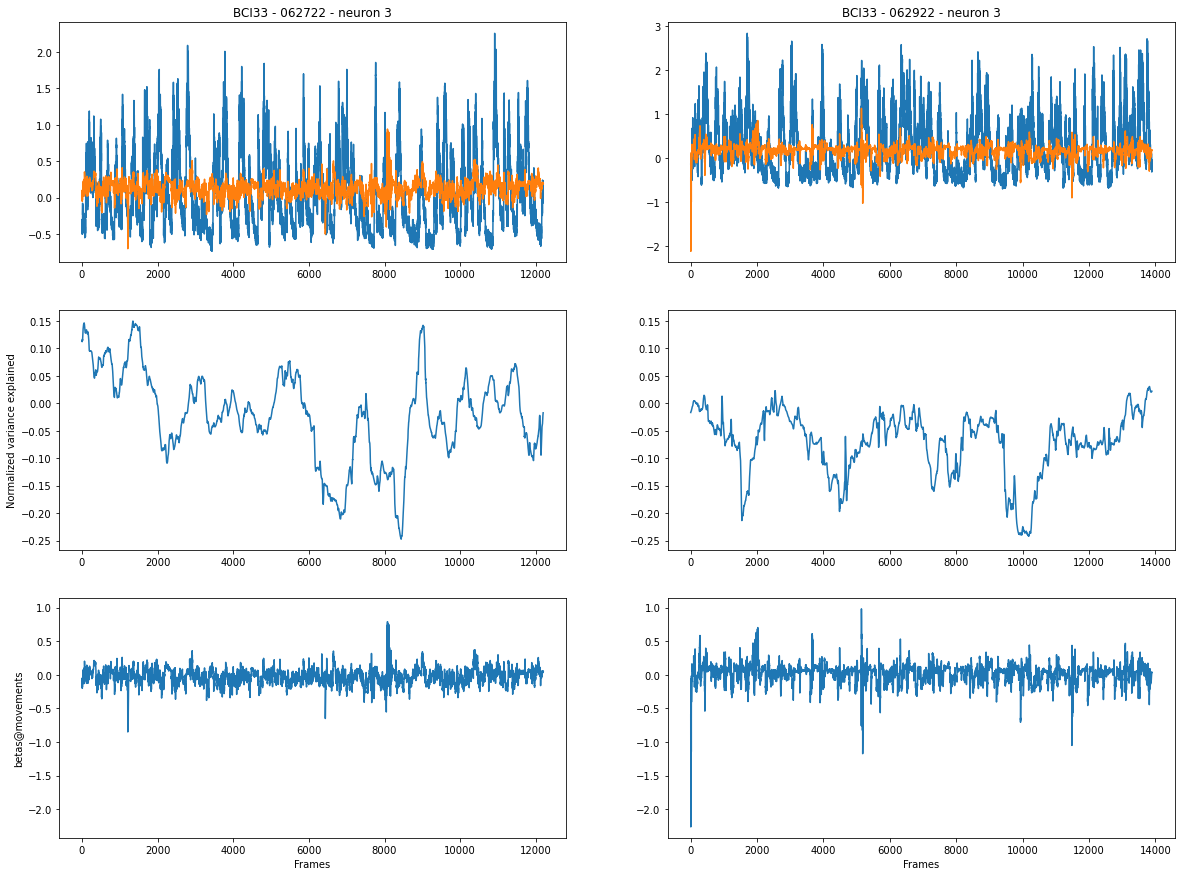

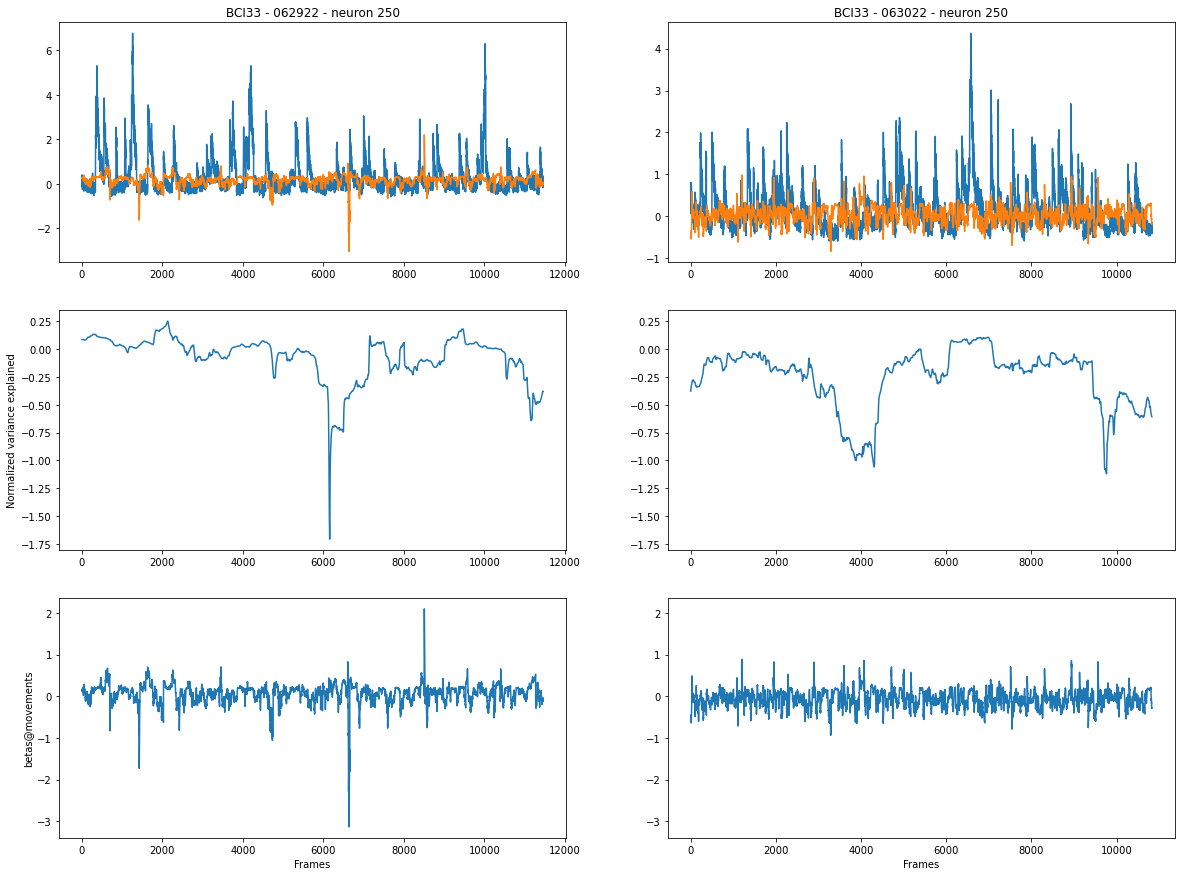

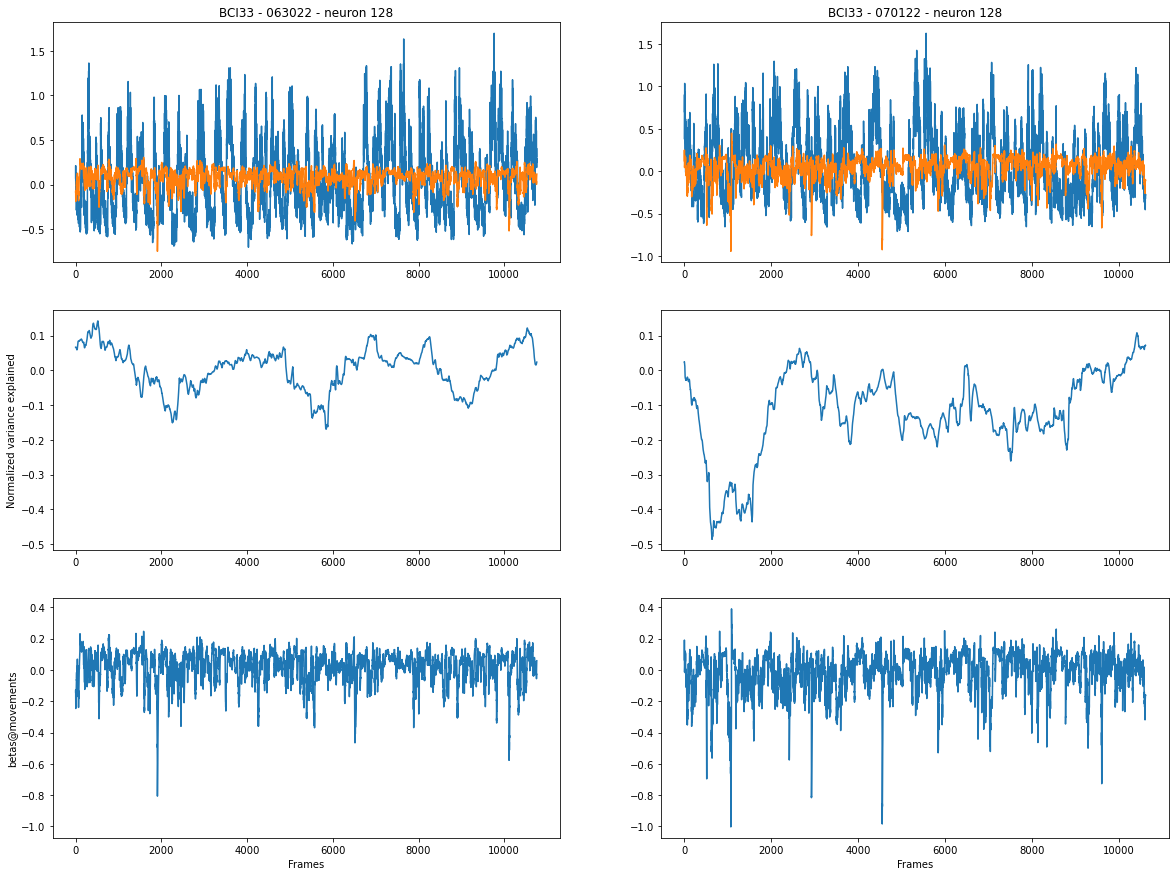

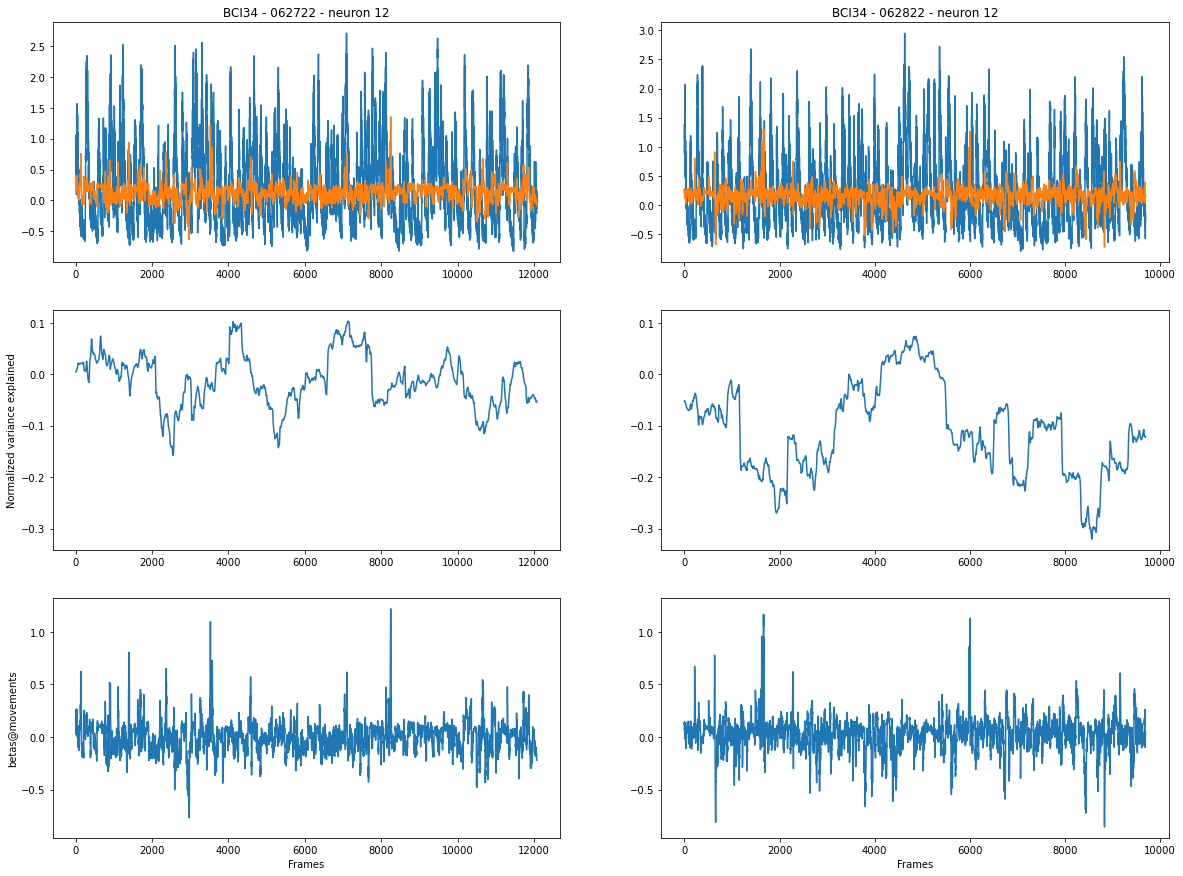

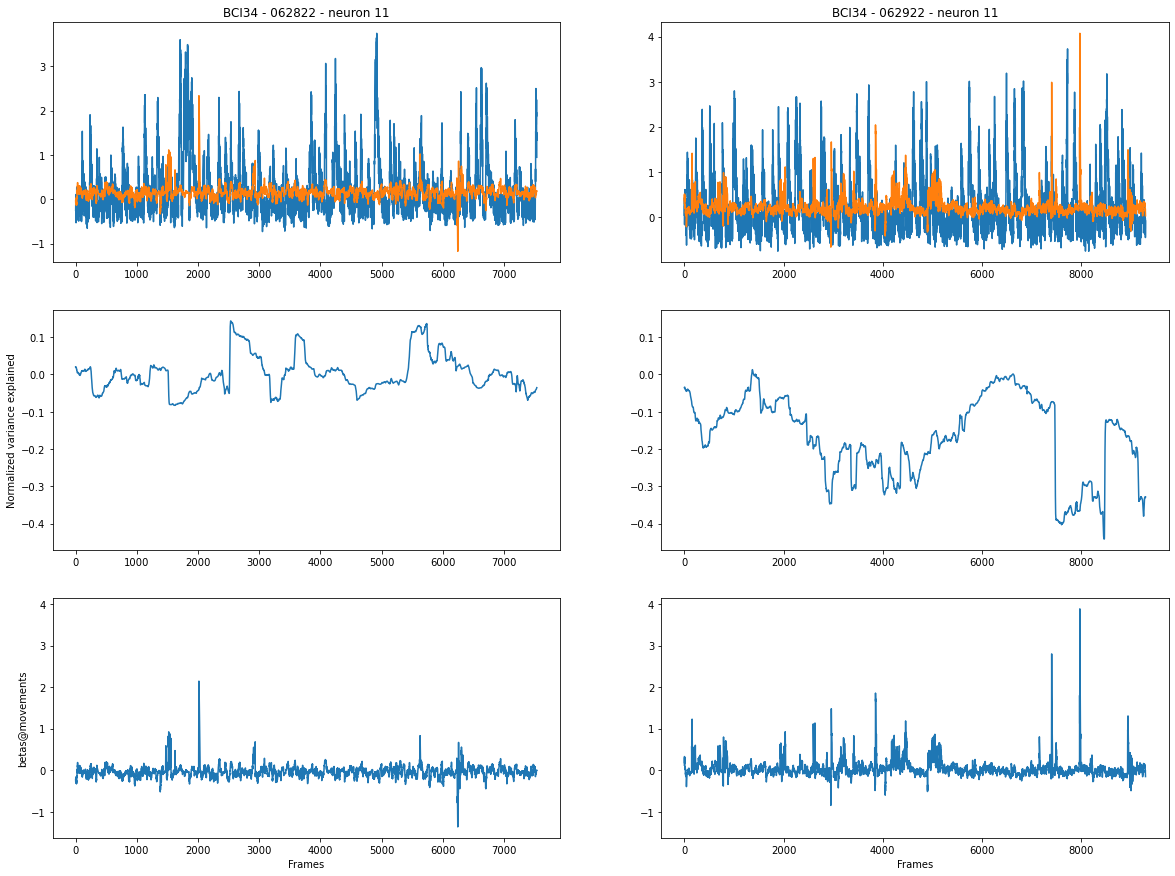

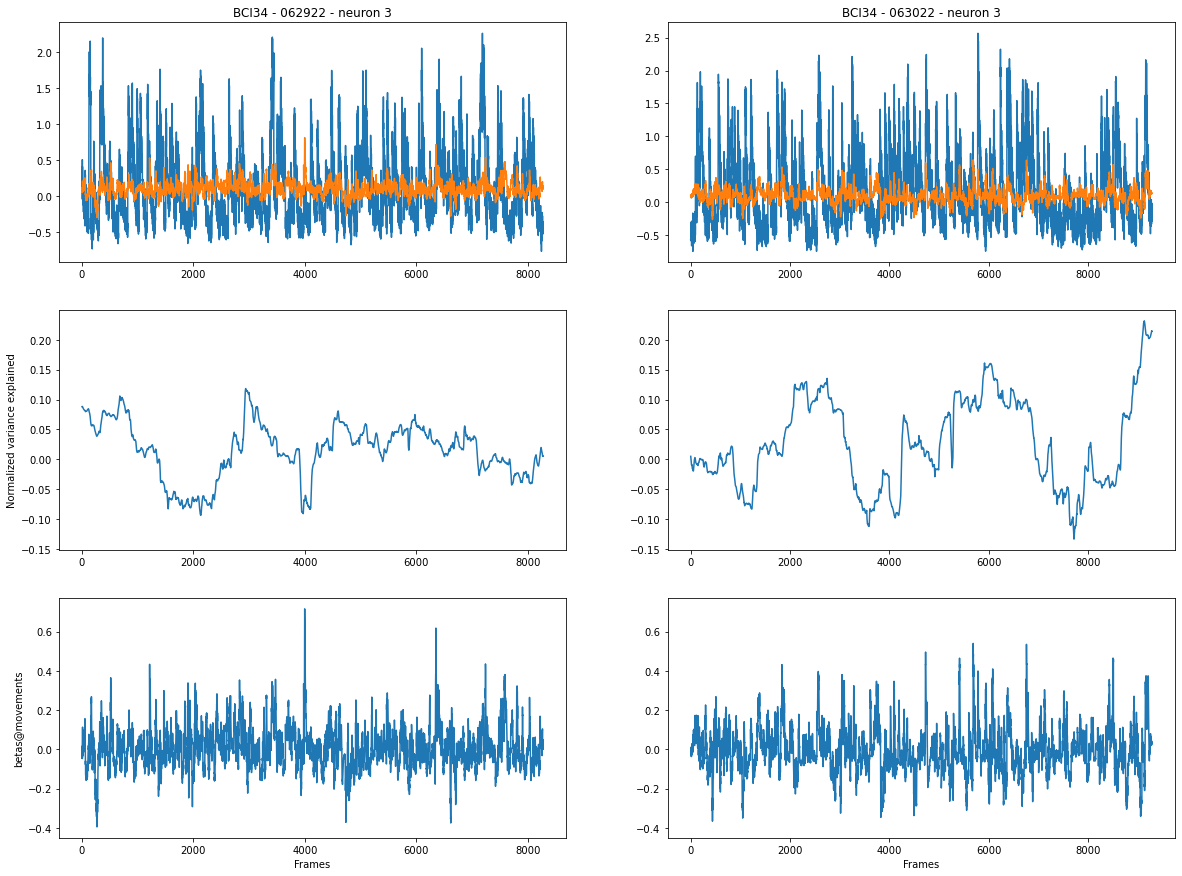

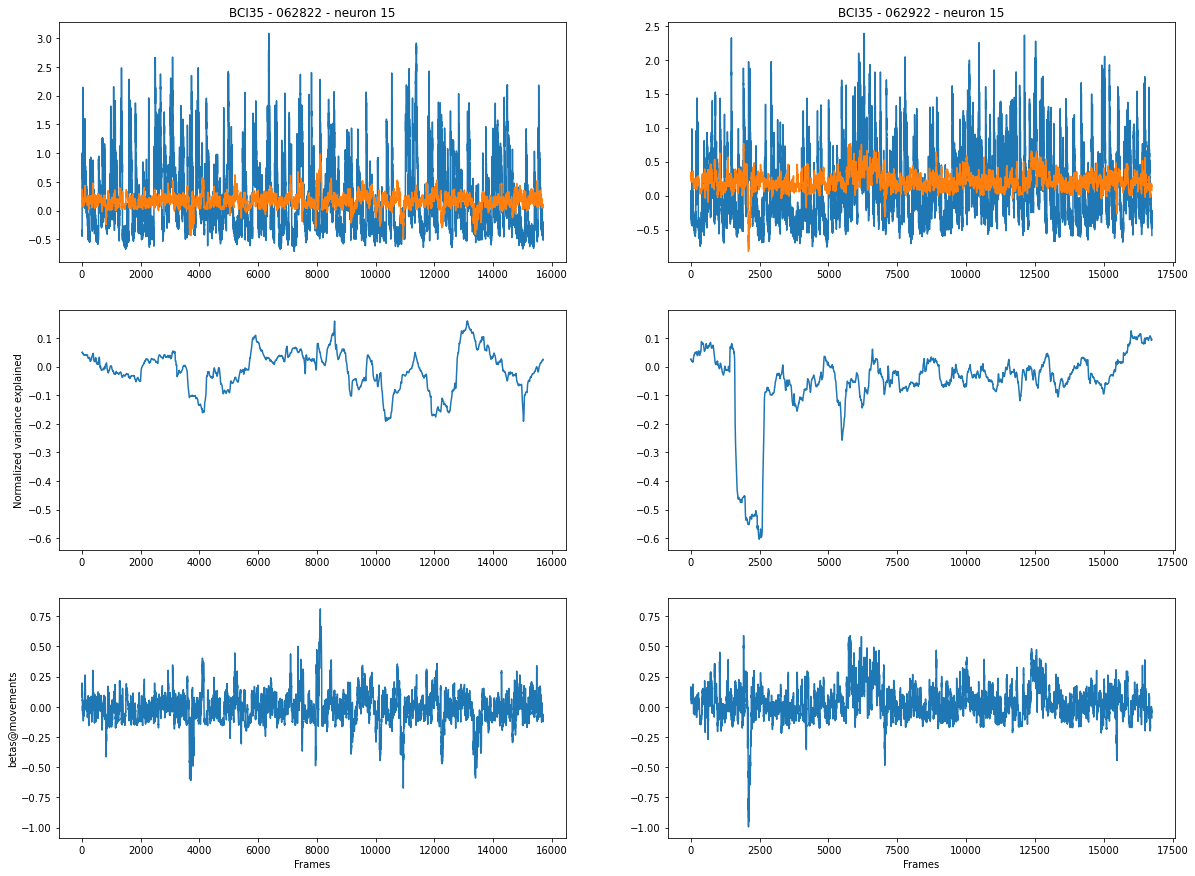

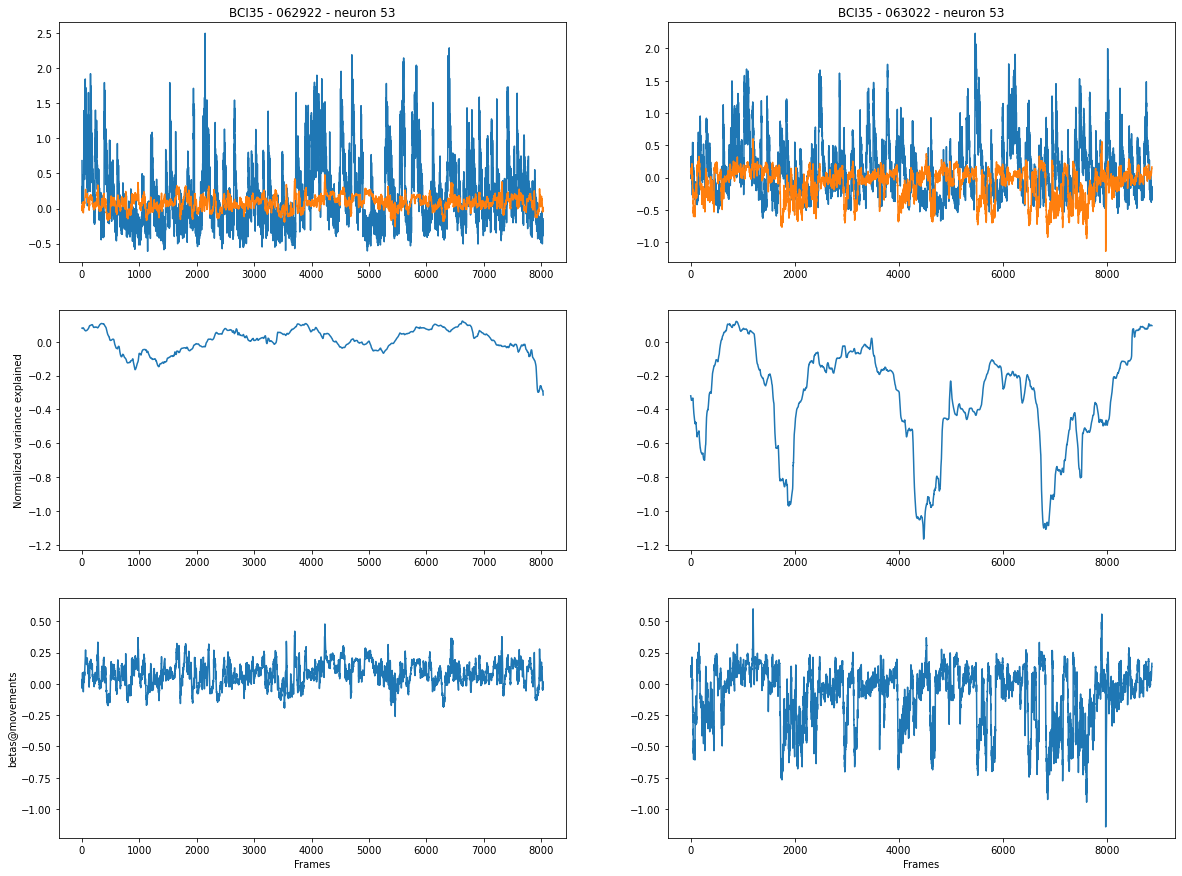

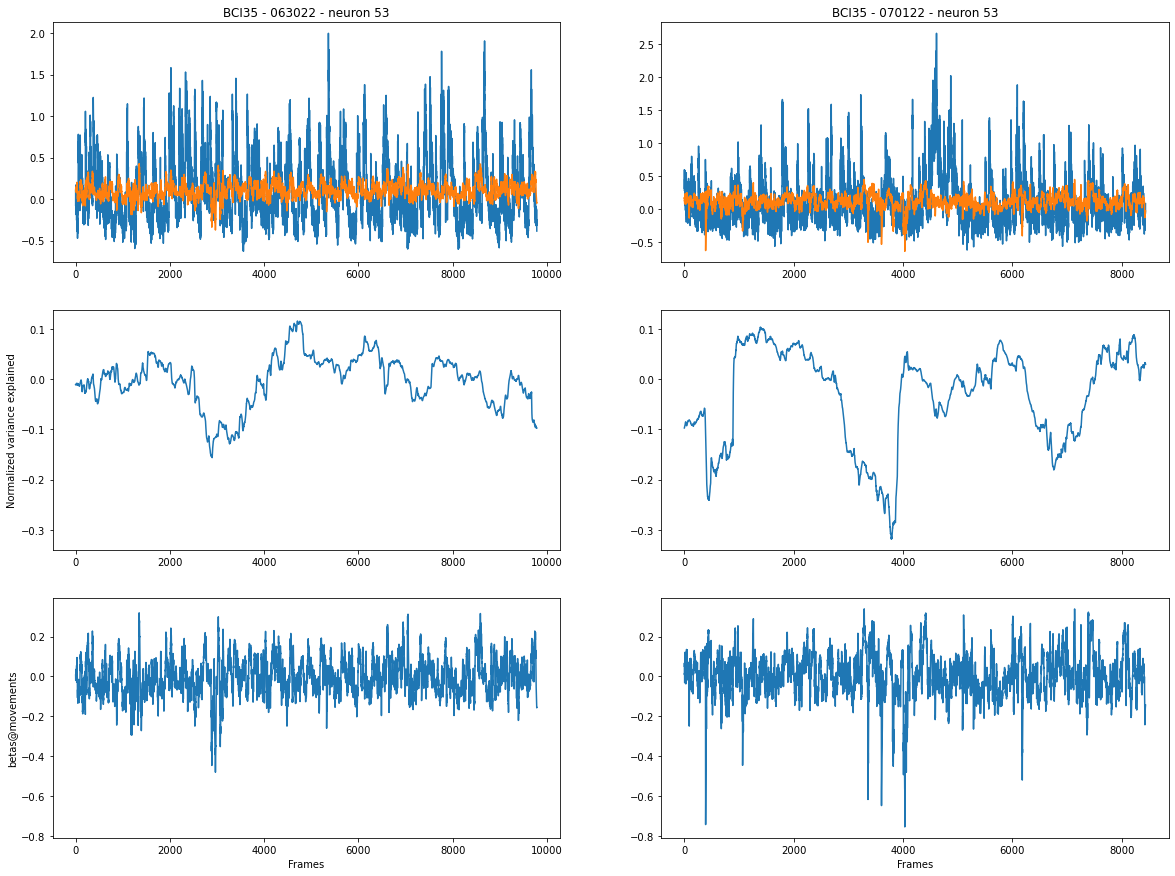

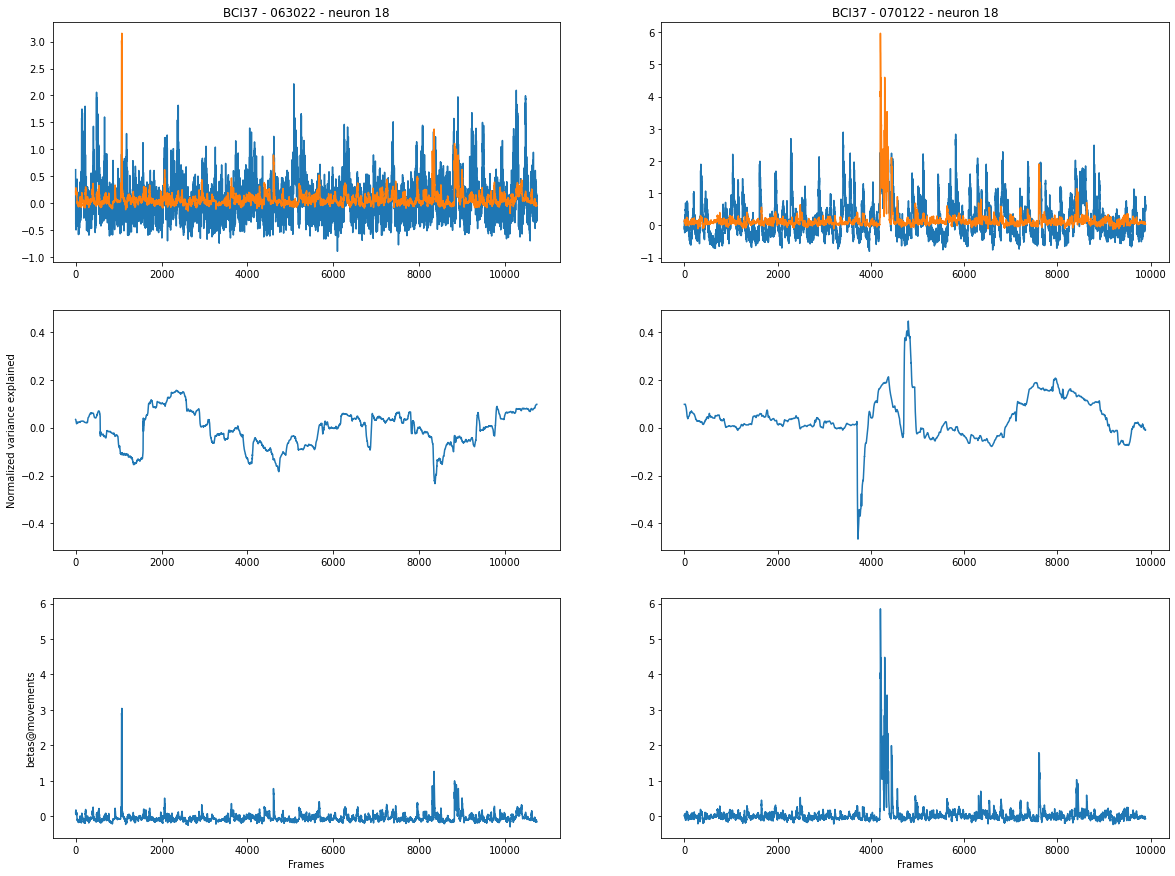

In [73]:
# Fit a CN on previous day's activity, then look at how the activity changes the next day

#create multi-session dlc-aligned
import scipy, random
zscore_fluorescence = False
session_frame_nums = []
create_lags = False
lags = np.arange(-20,25,5)

bootstrap = True
bootstrap_n = 100
bootstrap_ratio = .5 # for training, testing is the rest
if not bootstrap:
    bootstrap_n = 1


movements_output_dict={'mean_movements_ctrl':[],
                      'mean_movements_test':[],
                      'var_movements_ctrl':[],
                      'var_movements_test':[],
                      'variance_explained_ctrl':[],
                       'variance_explained_test':[],}
#mouse_now = np.unique(multi_session_dict['mouse'])[1]
for mouse_now in np.unique(multi_session_dict['mouse']):
    needed_sessions = np.where(np.asarray(multi_session_dict['mouse']) == mouse_now)[0]
    for ctrl_session,test_session in zip(needed_sessions[:-1],needed_sessions[1:]):
        mean_movements_ctrl = []
        mean_movements_test = []
        var_movements_ctrl = []
        var_movements_test = []
        variance_explained_ctrl = []
        variance_explained_test = []
        for bootstrap_i in range(bootstrap_n):
            DLC_aligned_ctrl_session = multi_session_dict['DLC_aligned'][ctrl_session].copy()
            F_ctrl_session = multi_session_dict['F'][ctrl_session]
            DLC_aligned_test_session = multi_session_dict['DLC_aligned'][test_session].copy()
            F_test_session = multi_session_dict['F'][test_session]
            
            if bootstrap: #bootstraps the train day
                #fit day (day before becoming a CN)
                trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][ctrl_session])
                trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
                trial_indices = np.arange(len(trial_end_frames))
                random.shuffle(trial_indices)
                trial_indices_ctrl_train = trial_indices[:int(len(trial_indices)*bootstrap_ratio)]
                
                trial_start_frames_ctrl_train = trial_start_frames[trial_indices_ctrl_train]
                trial_end_frames_ctrl_train = trial_end_frames[trial_indices_ctrl_train]
                DLC_aligned_ctrl_train_ = None
                F_ctrl_train_ = []
                for trial_start,trial_end in zip(trial_start_frames_ctrl_train,trial_end_frames_ctrl_train):
                    DLC_aligned_ctrl_train_ = pd.concat([DLC_aligned_ctrl_train_,DLC_aligned_ctrl_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_ctrl_train_) == 0:
                        F_ctrl_train_ = F_ctrl_session[:,trial_start:trial_end]
                    else:
                        F_ctrl_train_ = np.concatenate([F_ctrl_train_,F_ctrl_session[:,trial_start:trial_end]],1)
                F_ctrl_session_train = F_ctrl_train_
                DLC_aligned_ctrl_session_train = DLC_aligned_ctrl_train_
                
                trial_indices_ctrl_test = trial_indices[int(len(trial_indices)*bootstrap_ratio):]
                trial_start_frames_ctrl_test = trial_start_frames[trial_indices_ctrl_test]
                trial_end_frames_ctrl_test= trial_end_frames[trial_indices_ctrl_test]
                DLC_aligned_ctrl_test_ = None
                F_ctrl_test_ = []
                for trial_start,trial_end in zip(trial_start_frames_ctrl_test,trial_end_frames_ctrl_test):
                    DLC_aligned_ctrl_test_ = pd.concat([DLC_aligned_ctrl_test_,DLC_aligned_ctrl_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_ctrl_test_) == 0:
                        F_ctrl_test_ = F_ctrl_session[:,trial_start:trial_end]
                    else:
                        F_ctrl_test_ = np.concatenate([F_ctrl_test_,F_ctrl_session[:,trial_start:trial_end]],1)
                F_ctrl_session_test = F_ctrl_test_
                DLC_aligned_ctrl_session_test = DLC_aligned_ctrl_test_
                
                #test day (when being a CN)
                trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][test_session])
                trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
                trial_indices = np.arange(len(trial_end_frames))
                random.shuffle(trial_indices)
                trial_indices_test_session_test = trial_indices[:len(trial_indices_ctrl_test)] # same number of trials as for the test on the previous day
                trial_start_frames_test_session_test = trial_start_frames[trial_indices_test_session_test]
                trial_end_frames_test_session_test= trial_end_frames[trial_indices_test_session_test]
                DLC_aligned_test_session_test_ = None
                F_test_session_test_ = []
                for trial_start,trial_end in zip(trial_start_frames_test_session_test,trial_end_frames_test_session_test):
                    DLC_aligned_test_session_test_ = pd.concat([DLC_aligned_test_session_test_,DLC_aligned_test_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_test_session_test_) == 0:
                        F_test_session_test_ = F_test_session[:,trial_start:trial_end]
                    else:
                        F_test_session_test_ = np.concatenate([F_test_session_test_,F_test_session[:,trial_start:trial_end]],1)
                F_test_session_test = F_test_session_test_
                DLC_aligned_test_session_test = DLC_aligned_test_session_test_
            
            
            
            if zscore_fluorescence:
                print('implement Zscoring across datasets')
                # F_ctrl = scipy.stats.zscore(F_ctrl,axis = 1)
                # F_test = scipy.stats.zscore(F_test,axis = 1)
            for k in DLC_aligned_ctrl_session.keys():
                if 'mean' in k:# subtract mean from the raw position from day to day
                    DLC_aligned_ctrl_session_train[k] = DLC_aligned_ctrl_session_train[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_ctrl_session_test[k] = DLC_aligned_ctrl_session_test[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_ctrl_session[k] = DLC_aligned_ctrl_session[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_test_session_test[k] = DLC_aligned_test_session_test[k] - np.nanmean(DLC_aligned_test_session[k])
                    DLC_aligned_test_session[k] = DLC_aligned_test_session[k] - np.nanmean(DLC_aligned_test_session[k])
            
            
            DLC_aligned_all = pd.concat([DLC_aligned_ctrl_session, DLC_aligned_test_session], ignore_index=True)
            F_all = np.concatenate([F_ctrl_session,F_test_session],1)
            DLC_aligned = pd.concat([DLC_aligned_ctrl_session_test, DLC_aligned_test_session_test], ignore_index=True) # this is the test
            F = np.concatenate([F_ctrl_session_test,F_test_session_test],1)
            ctrl_frame_num = F_ctrl_session_test.shape[1]
            print(DLC_aligned.shape)
            


            for k in DLC_aligned.keys(): # remove eye and likelihood
                if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
                    DLC_aligned.pop(k)
                    DLC_aligned_all.pop(k)
                    DLC_aligned_ctrl_session.pop(k)
                    DLC_aligned_ctrl_session_train.pop(k)
                    DLC_aligned_ctrl_session_test.pop(k)
                    DLC_aligned_test_session.pop(k)
                    DLC_aligned_test_session_test.pop(k)
            for k in DLC_aligned.keys(): # remove lickport
                if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
                    DLC_aligned.pop(k)
                    DLC_aligned_all.pop(k)
                    DLC_aligned_ctrl_session.pop(k)
                    DLC_aligned_ctrl_session_train.pop(k)
                    DLC_aligned_ctrl_session_test.pop(k)
                    DLC_aligned_test_session.pop(k)
                    DLC_aligned_test_session_test.pop(k)
            for k in DLC_aligned.keys(): # normalize data
                mean_val = DLC_aligned_all[k].mean()
                std_val = DLC_aligned_all[k].std()
                
                DLC_aligned[k] = (DLC_aligned[k] - mean_val)/std_val
                DLC_aligned_all[k] = (DLC_aligned_all[k] - mean_val)/std_val
                DLC_aligned_ctrl_session[k] = (DLC_aligned_ctrl_session[k] - mean_val)/std_val
                DLC_aligned_ctrl_session_train[k] = (DLC_aligned_ctrl_session_train[k] - mean_val)/std_val
                DLC_aligned_ctrl_session_test[k] = (DLC_aligned_ctrl_session_test[k] - mean_val)/std_val
                DLC_aligned_test_session[k] = (DLC_aligned_test_session[k] - mean_val)/std_val
                DLC_aligned_test_session_test[k] = (DLC_aligned_test_session_test[k] - mean_val)/std_val
                
                #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))
            

            #create offsets
            if create_lags:
                print('sort out creating lags')
#                 cols_new = []
#                 for col in DLC_aligned.columns:
#                     for offset in lags:
#                         cols_new.append((col[0],offset,col[1],col[2]))
#                 df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
#                 df2_ctrl = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
#                 df2_test = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

#                 for k in df2.keys():
#                     df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
#                     df2_ctrl[k] = pd.Series(np.roll(DLC_aligned_ctrl[k[0],k[2],k[3]],k[1]))
#                     df2_test[k] = pd.Series(np.roll(DLC_aligned_test[k[0],k[2],k[3]],k[1]))
#                 DLC_aligned = df2    
#                 DLC_aligned_ctrl = df2_ctrl 
#                 DLC_aligned_test = df2_test


            cn = multi_session_dict['cn'][test_session] # IT iIS NOT THE CN
            scores_, beta_, intercept_ = pipeline_regression.linear_regression(F_ctrl_session_train[cn:cn+1], DLC_aligned_ctrl_session_train)
            scores_ = scores_[0]
            beta_ = beta_[0]
            intercept_ = intercept_[0]

            var_win = 1000
            original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
            predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
            residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
            nonexplained_variance = residual_variance/original_variance
            explained_variance = 1-nonexplained_variance


            orig_var_ctrl = np.nanvar(F_ctrl_session_test[cn,:])
            residual_var_ctrl = np.nanvar(F_ctrl_session_test[cn,:] - ((beta_@DLC_aligned_ctrl_session_test.T.values) + intercept_))
            explained_variance_ctrl = 1- residual_var_ctrl/orig_var_ctrl

            orig_var_test = np.nanvar(F_test_session_test[cn,:])
            residual_var_test = np.nanvar(F_test_session_test[cn,:] - ((beta_@DLC_aligned_test_session_test.T.values) + intercept_))
            explained_variance_test = 1- residual_var_test/orig_var_test
            
            
            movements_ctrl = (beta_@DLC_aligned_ctrl_session_test.T.values)
            movements_test = (beta_@DLC_aligned_test_session_test.T.values)
            if bootstrap_i == 0:
                fig = plt.figure(figsize = [20,15])
                ax_ctrl_trace = fig.add_subplot(3,2,1)
                ax_ctrl_trace.plot(F_ctrl_session_test[cn, :], label=f'neuron {cn} Flourescence Trace')
                ax_ctrl_trace.plot((beta_@DLC_aligned_ctrl_session_test.T.values) + intercept_, label='Fitted Data')
                ax_ctrl_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][ctrl_session],cn))

                ax_ctrl_var_explained = fig.add_subplot(3,2,3)
                ax_ctrl_var_explained.plot(explained_variance[:ctrl_frame_num])
                ax_ctrl_var_explained.set_ylabel('Normalized variance explained')


                ax_test_trace = fig.add_subplot(3,2,2)
                ax_test_trace.plot(F_test_session_test[cn, :], label=f'neuron {cn} Flourescence Trace')
                ax_test_trace.plot((beta_@DLC_aligned_test_session_test.T.values) + intercept_, label='Fitted Data')
                ax_test_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][test_session],cn))


                ax_test_var_explained = fig.add_subplot(3,2,4,sharey = ax_ctrl_var_explained)
                ax_test_var_explained.plot(explained_variance[ctrl_frame_num:])

                ax_ctrl_movements = fig.add_subplot(3,2,5)
                
                ax_ctrl_movements.plot(movements_ctrl)
                ax_ctrl_movements.set_ylabel('betas@movements')
                ax_ctrl_movements.set_xlabel('Frames')

                ax_test_movements = fig.add_subplot(3,2,6,sharey = ax_ctrl_movements)
                
                ax_test_movements.plot(movements_test)
                ax_test_movements.set_xlabel('Frames')
            
            
            mean_movements_ctrl.append(np.nanmean(movements_ctrl))
            mean_movements_test.append(np.nanmean(movements_test))
            var_movements_ctrl.append(np.nanvar(movements_ctrl))
            var_movements_test.append(np.nanvar(movements_test))
            variance_explained_ctrl.append(explained_variance_ctrl)
            variance_explained_test.append(explained_variance_test)
            #break
        movements_output_dict['mean_movements_ctrl'].append(mean_movements_ctrl)
        movements_output_dict['mean_movements_test'].append(mean_movements_test)
        movements_output_dict['var_movements_ctrl'].append(var_movements_ctrl)
        movements_output_dict['var_movements_test'].append(var_movements_test)
        movements_output_dict['variance_explained_ctrl'].append(variance_explained_ctrl)
        movements_output_dict['variance_explained_test'].append(variance_explained_test)

    #break


In [67]:
k

('Pole', 'diff', 'x')

(-0.5, 1.5)

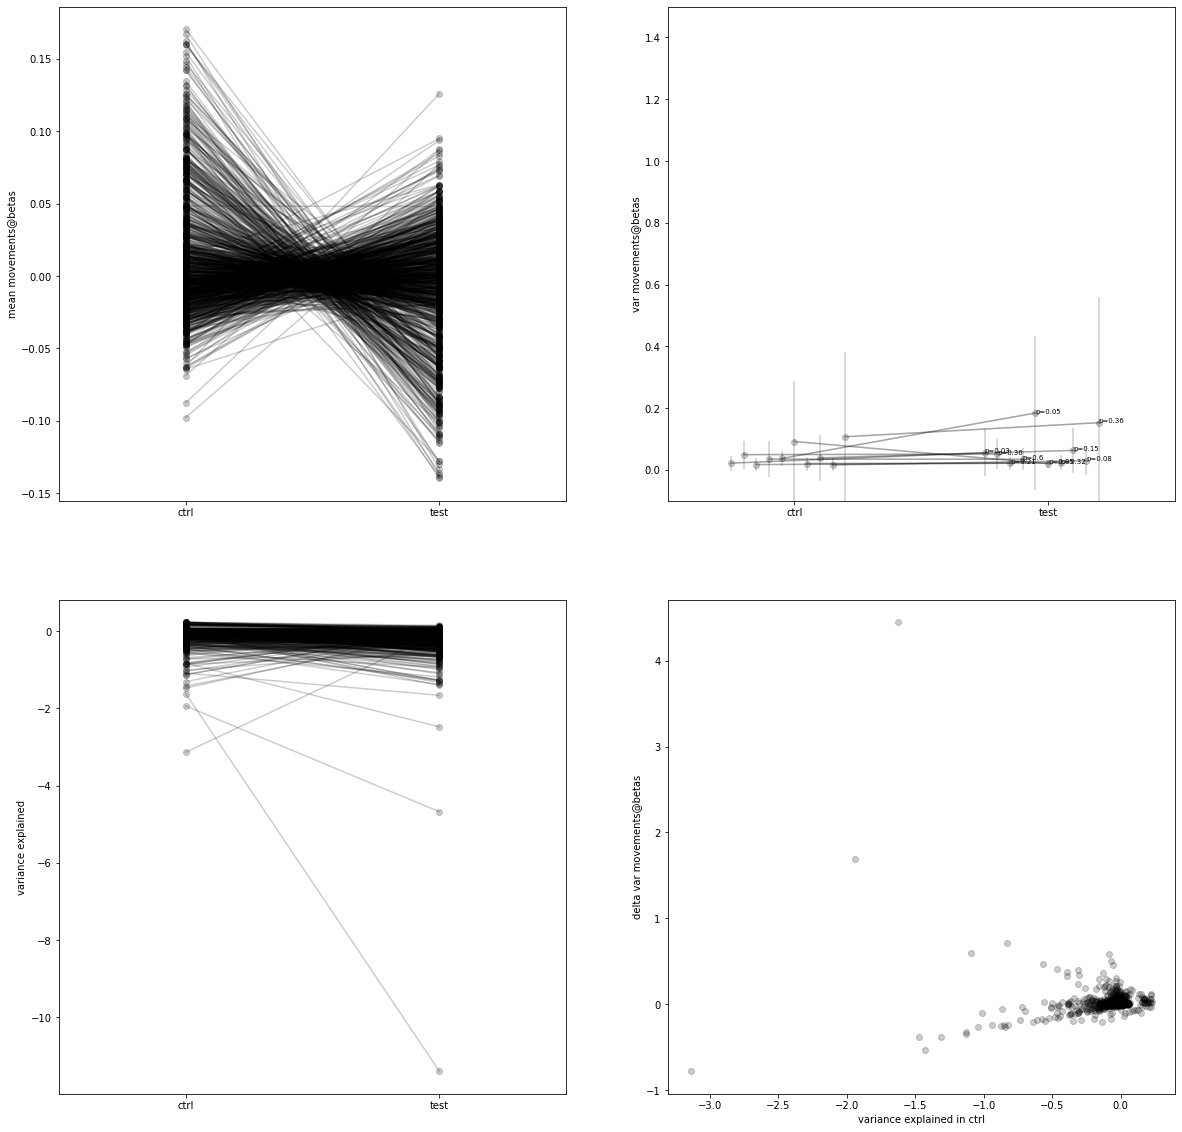

In [77]:
fig = plt.figure(figsize = [20,20])
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('mean movements@betas')
ax2 = fig.add_subplot(2,2,2)
ax2.set_ylabel('var movements@betas')
ax3 = fig.add_subplot(2,2,4)
ax4 = fig.add_subplot(2,2,3)
p_list = []
for mean1,mean2 in zip(np.concatenate(movements_output_dict['mean_movements_ctrl']),np.concatenate(movements_output_dict['mean_movements_test'])):
    ax1.plot([0,1],[mean1,mean2],'ko-',alpha = .2)
var_diff = []
for i, (var1,var2) in enumerate(zip(movements_output_dict['var_movements_ctrl'],movements_output_dict['var_movements_test'])):
    xvals = [0+i*.05-.25,1+i*.05-.25]
    yvals = [np.nanmean(var1),np.nanmean(var2)]
    yerrors = np.concatenate([np.diff(np.percentile(var1,[10,90])),np.diff(np.percentile(var2,[10,90]))])
    ax2.plot(xvals,yvals,'ko-',alpha = .2)
    p = 1- np.nanmean(((np.asarray(var2)-np.asarray(var1))>0))
    p_list.append(p)
    ax2.errorbar(xvals,yvals,yerrors,color = 'black',alpha = .2)
    ax2.text (xvals[1],yvals[1],'p={}'.format(np.round(p,2)),fontsize = 'x-small')
    var_diff.append(np.asarray(var2)-np.asarray(var1))
var_diff = np.concatenate(var_diff) 
for varexp1,varexp2 in zip(np.concatenate(movements_output_dict['variance_explained_ctrl']),np.concatenate(movements_output_dict['variance_explained_test'])):
    ax4.plot([0,1],[varexp1,varexp2],'ko-',alpha = .2)
ax4.set_ylabel('variance explained')

ax3.plot(np.concatenate(movements_output_dict['variance_explained_ctrl']),var_diff,'ko',alpha = .2)
ax3.set_xlabel('variance explained in ctrl')
ax3.set_ylabel('delta var movements@betas')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['ctrl','test'])
ax1.set_xlim([-.5,1.5])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['ctrl','test'])
ax2.set_xlim([-.5,1.5])
ax2.set_ylim([-.1,1.5])
ax4.set_xticks([0,1])
ax4.set_xticklabels(['ctrl','test'])
ax4.set_xlim([-.5,1.5])
#ax1.plot(np.concatenate([np.ones_like(movements_output_dict['mean_movements_ctrl']),np.ones_like(movements_output_dict['mean_movements_test'])*2]),np.concatenate([movements_output_dict['mean_movements_ctrl'],movements_output_dict['mean_movements_test']]),'ko')

## 1- np.mean(np.asarray(movements_output_dict['var_movements_test'])-np.asarray(movements_output_dict['var_movements_ctrl'])>0,1)

/tmp/ipykernel_8748/3653868128.py:37: RuntimeWarning: Mean of empty slice
  baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
/tmp/ipykernel_8748/3653868128.py:37: RuntimeWarning: Mean of empty slice
  baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
/tmp/ipykernel_8748/3653868128.py:37: RuntimeWarning: Mean of empty slice
  baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
/tmp/ipykernel_8748/3653868128.py:37: RuntimeWarning: Mean of empty slice
  baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
/tmp/ipykernel_8748/3653868128.py:37: RuntimeWarning: Mean of empty slice
  baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-base

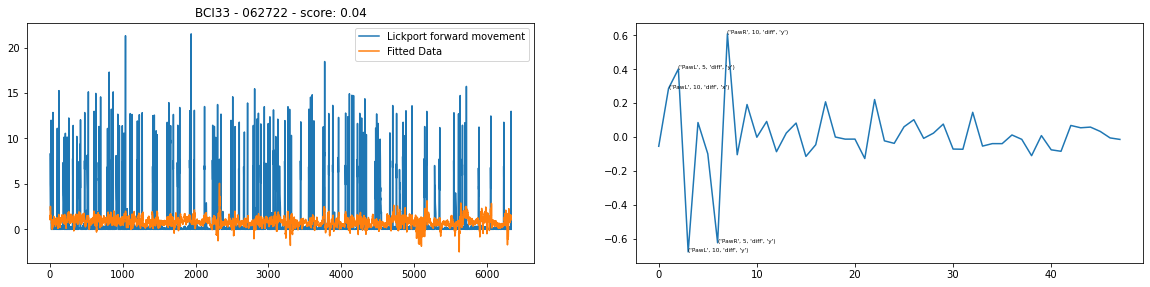

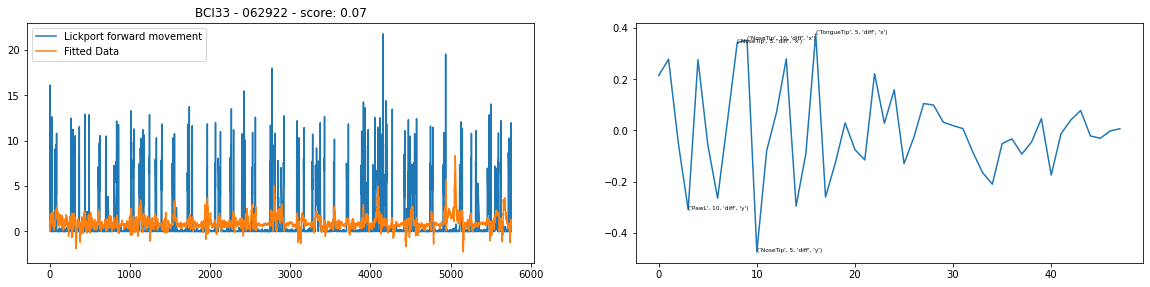

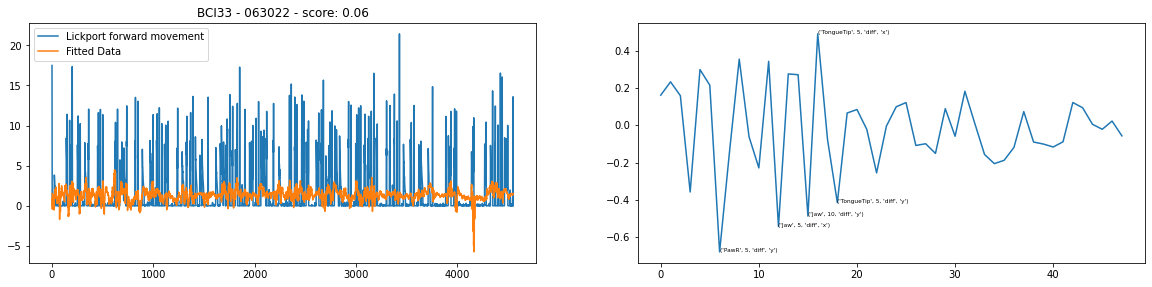

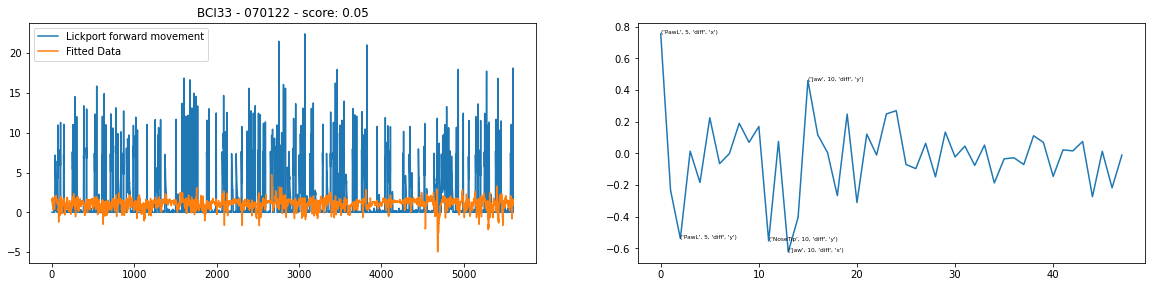

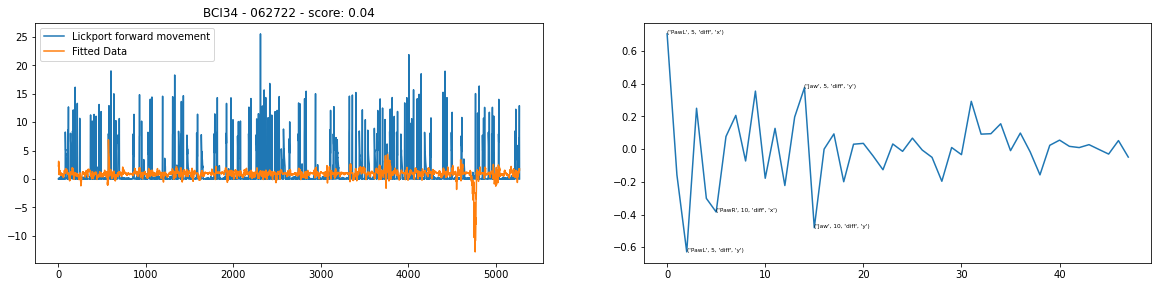

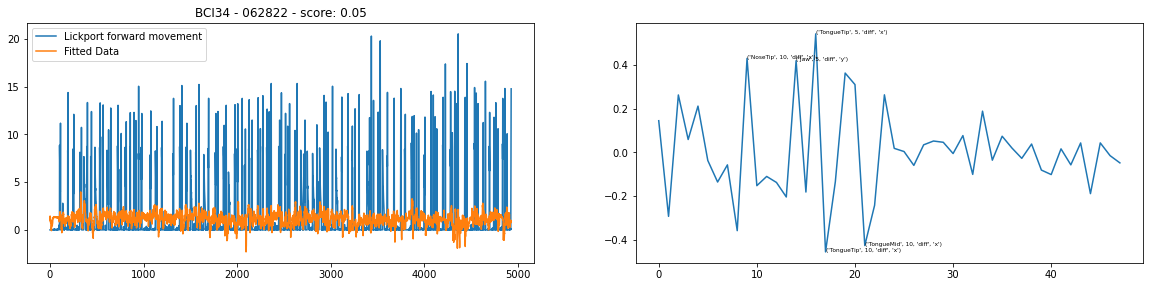

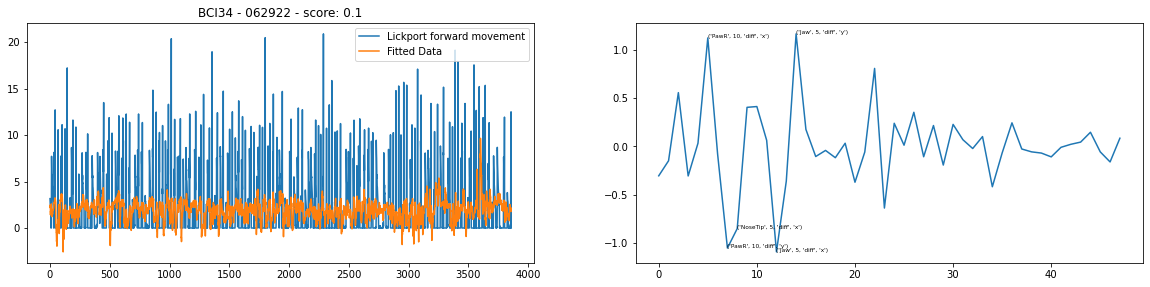

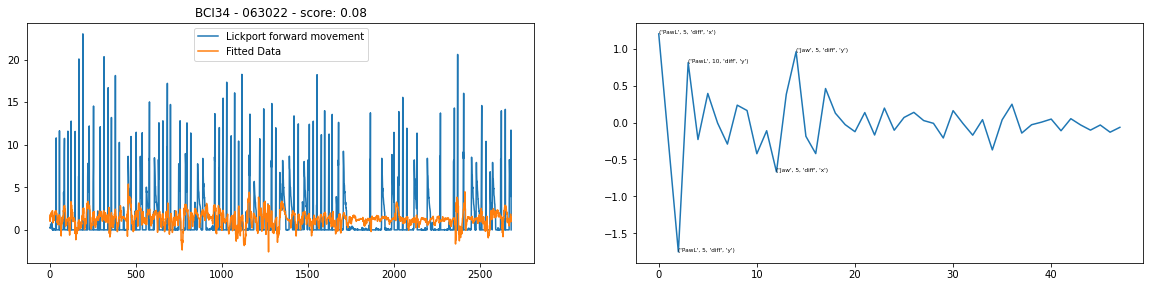

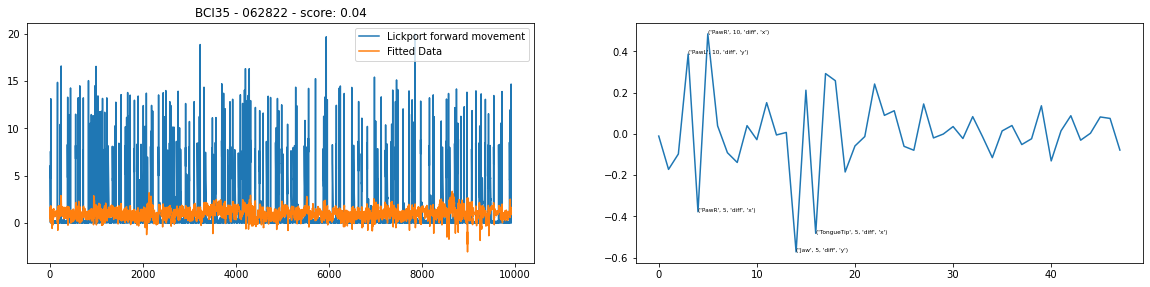

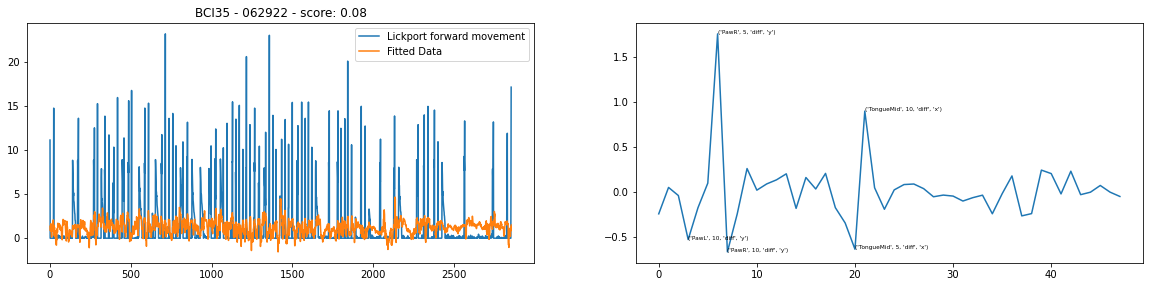

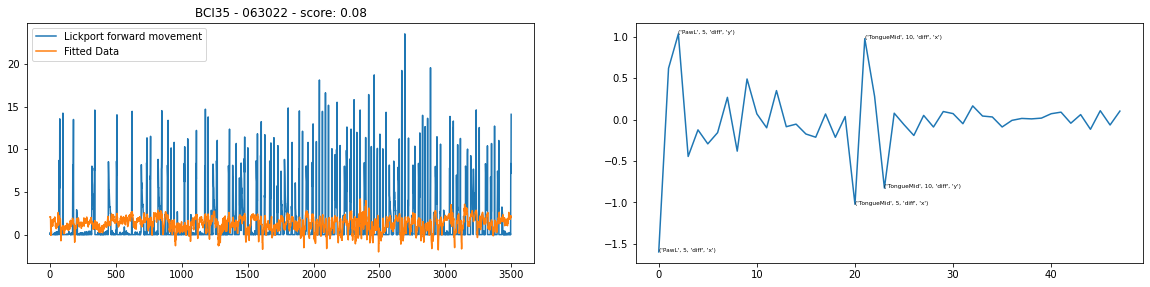

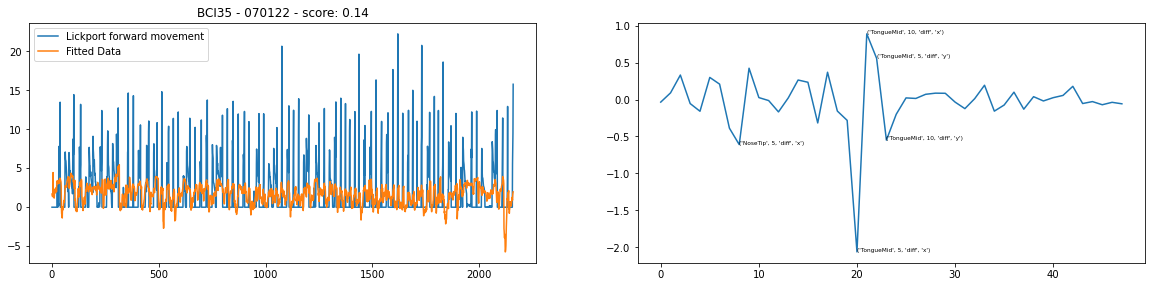

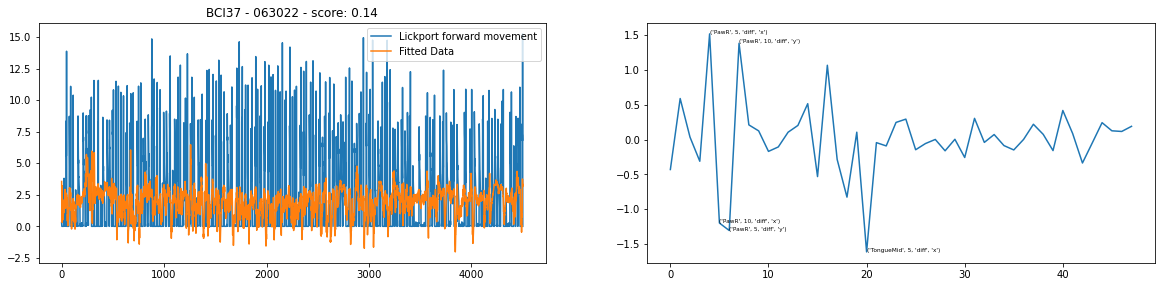

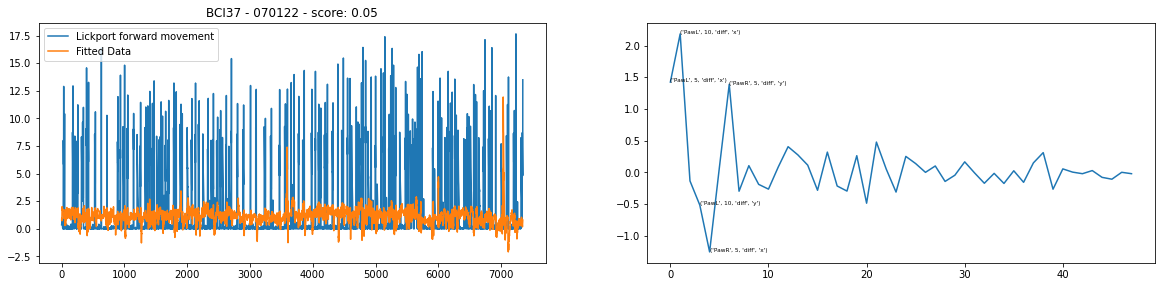

In [189]:
# can we predict lickport movements with behavior??
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
create_lags = True
movement_threshold = 10
baseline_length = 10 # before lickport movement
peak_length = 10  # after start of lickport movement
for needed_session in range(len(multi_session_dict['DLC_aligned'])):

    DLC_aligned= multi_session_dict['DLC_aligned'][needed_session].copy()
    lickport_movement = DLC_aligned['Lickport']['diff_signed']['x'].values    
    lickport_movement[lickport_movement<0] = 0
    for k in DLC_aligned.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned[k] = DLC_aligned[k] - np.nanmean(DLC_aligned[k])
    for k in DLC_aligned.keys(): # normalize data
        DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()

    for k in DLC_aligned.keys(): # remove eye and likelihood
        if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
            DLC_aligned.pop(k)
    for k in DLC_aligned.keys(): # remove lickport
        if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
            DLC_aligned.pop(k)
    
    #lickport_movement = scipy.stats.zscore(lickport_movement)
    
    trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][needed_session])
    trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
    needed_indices = []
    lickport_movement_magnitudes = []
    baseline_movements = []
    for ti,(tstart,tend) in enumerate(zip(trial_start_frames,trial_end_frames)): #Find the first lickport movement
        lickport_movement_now = lickport_movement[tstart:tend]
        lickport_start_idx = np.argmax(lickport_movement_now>movement_threshold)+1
        lickport_movement_magnitudes.append(np.nanmean(lickport_movement_now[lickport_start_idx:lickport_start_idx+peak_length]))
        baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
        lickport_movement_now[lickport_start_idx:] = np.nan
        lickport_movement[tstart:tend] = lickport_movement_now
        needed_indices.append(np.arange(lickport_start_idx)+tstart)
    
    lickport_movement = lickport_movement[np.concatenate(needed_indices)]
    DLC_aligned = DLC_aligned.iloc[np.concatenate(needed_indices)].reset_index()
    DLC_aligned.pop('index')
    


    #create offsets - 1 second back and forward
    if create_lags:
        offsets = np.arange(5,15,5)
        cols_new = []
        for col in DLC_aligned.columns:
            for offset in offsets:
                cols_new.append((col[0],offset,col[1],col[2]))
        df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

        for k in df2.keys():
            df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
        DLC_aligned = df2    


    X = DLC_aligned.values
    Y = lickport_movement
    #scores_, beta_, intercept_ = pipeline_regression.linear_regression(Y, X)
    n_features = X.shape[1]
    lr = LinearRegression()
    half = int(len(Y)*.8)
    lr.fit(X[:half,:], Y[:half])
    #scores = cross_val_score(lr, X, Y, cv=10)
    #scores_ = np.nanmean(scores)
    scores_=lr.score(X[:half,:], Y[:half])
    beta_ = lr.coef_
    intercept_ = lr.intercept_


    
    
    
    #scores_, beta_, intercept_ = pipeline_regression.ridge_regression(F_ctrl[cn:cn+1], DLC_aligned_ctrl)
    # scores_ = scores_[0]
    # beta_ = beta_[0]
    # intercept_ = intercept_[0]
    fig = plt.figure(figsize = [20,15])
    ax_trace = fig.add_subplot(3,2,1)
    ax_trace.plot(Y, label=f'Lickport forward movement')
    ax_trace.plot((beta_@X.T) + intercept_, label='Fitted Data')
    #ax_trace.set_xlim([0,5000])
    ax_trace.set_title('{} - {} - score: {}'.format(multi_session_dict['mouse'][needed_session], multi_session_dict['session'][needed_session],np.round(scores_,2)))

    ax_trace.legend()

    ax_coef = fig.add_subplot(3,2,2)
    ax_coef.plot(beta_)
    for i in np.argsort(np.abs(beta_))[::-1][:5]:
        ax_coef.text(i,beta_[i],DLC_aligned.keys()[i],fontsize = 'xx-small')

In [133]:
import sklearn
sklearn.model_selection.cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [ ]:
# Matt Bull's dimensionality estimation
from sklearn.decomposition import PCA
import matplotlib.cm as cm

windowsize = 2000
windowstep = 400
PCAcomponents = 100

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2,sharex = ax)
sessionstostudy = multi_session_dict['mat_idx']#np.where(np.array(multi_session_behavior_data['session']).ravel() != None)[0]
cmap = cm.jet(np.linspace(0,1,len(sessionstostudy)))
sessionct=0
traces_calcium =[]
t_ = []
traces_movement = []
for ii,session in enumerate(sessionstostudy):
    neuron = multi_session_behavior_data['conditioned_neuron'][session]
    #df = multi_session_behavior_data['df_closedLoop'][session]
    df = multi_session_dict['F'][ii].T
    dlc = multi_session_dict['DLC_aligned'][ii]
    numwindow = int((df.shape[0]-windowsize)/windowstep)
    dimovertime = np.zeros([numwindow,1])
    dimovertime_dlc = np.zeros([numwindow,1])
    if np.min(df[0:windowsize].shape) > PCAcomponents:
        pca = PCA(n_components=PCAcomponents, svd_solver='full')
        for i in range(numwindow):
            pca.fit(df[i*windowstep:i*windowstep+windowsize,:])
            dimovertime[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))
            
            pca.fit(dlc[i*windowstep:i*windowstep+windowsize])
            dimovertime_dlc[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))

        ax.plot(np.arange(numwindow)*windowstep, dimovertime.ravel(),'.-', color=cmap[sessionct,:], lw = 2, label='session = ' + str(session))
        ax2.plot(np.arange(numwindow)*windowstep, dimovertime_dlc.ravel(),'.--', color=cmap[sessionct,:], lw = 2, label='session_dlc = ' + str(session))
        traces_calcium.append(dimovertime.ravel())
        traces_movement.append(dimovertime_dlc.ravel())
    sessionct += 1

l_ = []
for t in traces_calcium:
    l_.append(len(t))
l_ = np.min(l_)
dim_ca_matrix = np.zeros([len(traces_calcium),l_])
dim_dlc_matrix = np.zeros([len(traces_calcium),l_])
for i,(c,m) in enumerate(zip(traces_calcium,traces_movement)):
    dim_ca_matrix[i,:] = c[:l_]
    dim_dlc_matrix[i,:] = m[:l_]
ax.plot(np.arange(l_)*windowstep,np.mean(dim_ca_matrix,0),'k.-',linewidth = 4)    
ax2.plot(np.arange(l_)*windowstep,np.mean(dim_dlc_matrix,0),'k.--',linewidth = 4)    
   
    
ax.set_ylabel('Effective Dimensionality (calcium)')
ax2.set_ylabel('Effective Dimensionality (movements)')
plt.xlabel('Time')
ax.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()



In [27]:
# save DLC data and calcium traces to fit the neural network in FaceMap
import h5py
def save_dict_to_hdf5(h5file, path, data_dict):
    """
    Saves dictionary to an HDF5 file. Adapted from https://github.com/talmolab/sleap/blob/391bc0421fe3820ddd6b5d07e31311d60b129fe3/sleap/util.py#L116
    Calls itself recursively if items in dictionary are not
    `np.ndarray`, `np.int64`, `np.float64`, `str`, or bytes.
    Objects must be iterable.
    Args:
        h5file: The HDF5 filename object to save the data to.
            Assume it is open.
        path: The path to group save the dict under.
        data_dict: The dict containing data to save.
    Raises:
        ValueError: If type for item in dict cannot be saved.
    Returns:
        None
    """
    for key, item in list(data_dict.items()):
        if item is None:
            h5file[path + key] = ""
        elif isinstance(item, bool):
            h5file[path + key] = int(item)
        elif isinstance(item, list):
            items_encoded = []
            for it in item:
                if isinstance(it, str):
                    items_encoded.append(it.encode("utf8"))
                else:
                    items_encoded.append(it)

            h5file[path + key] = np.asarray(items_encoded)
        elif isinstance(item, (str)):
            h5file[path + key] = item.encode("utf8")
        elif isinstance(
            item, (np.ndarray, np.int64, np.float64, str, bytes, float)
        ):
            h5file[path + key] = item
        elif isinstance(item, dict):
            save_dict_to_hdf5(h5file, path + key + "/", item)
        elif isinstance(item, int):
            h5file[path + key] = item
        else:
            raise ValueError("Cannot save %s type" % type(item))
            
            
facemap_keys = ['eye(back)',
                 'eye(bottom)',
                 'eye(front)',
                 'eye(top)',
                 'lowerlip',
                 'mouth',
                 'nose(bottom)',
                 'nose(r)',
                 'nose(tip)',
                 'nose(top)',
                 'nosebridge',
                 'paw',
                 'whisker(I)',
                 'whisker(II)',
                 'whisker(III)']
dict_out = {}
for k in facemap_keys:
    dict_out[k] = {}
dlc_keys = []
dlc_keys_rest = []
for k in DLC_aligned.keys():
    if 'mean' in k:
        dlc_keys.append(k)
    else:
        dlc_keys_rest.append(k)
dlc_keys.extend(dlc_keys_rest)
for i,k in enumerate(dlc_keys):
    idx = int((i-i%3)/3)
    if idx==len(facemap_keys):
        print(k)
        break
    if 'likelihood' in k:
        dict_out[facemap_keys[idx]][k[-1]] = np.ones_like(DLC_aligned[k].values)
    else:
        dict_out[facemap_keys[idx]][k[-1]] = DLC_aligned[k].values
dict_out = {'Facemap':dict_out}           
     
    
with h5py.File("/home/jupyter/bucket/test_movements.h5", "w") as f:
    save_dict_to_hdf5(f, "", dict_out)
np.save("/home/jupyter/bucket/test_neurons.npy",F)
np.save("/home/jupyter/bucket/timestamps.npy",np.arange(F.shape[1]))

from sklearn.decomposition import PCA
PCAcomponents = 100
pca = PCA(n_components=PCAcomponents, svd_solver='full')
pca.fit(F)
np.save("/home/jupyter/bucket/test_neurons_pca.npy",pca.components_)

('NoseTip', -20, 'mean', 'y')


(-5.0, 5.0)

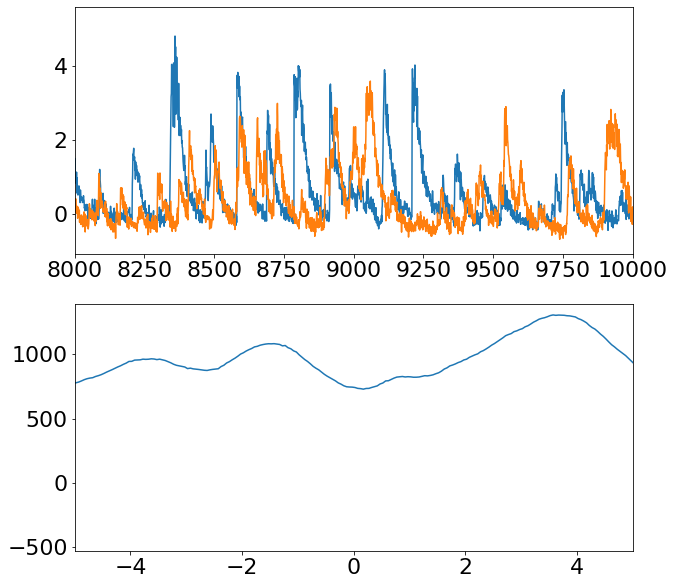

In [36]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax.plot(F[1,:])
ax.plot(F[3,:])
ax.set_xlim([8000,10000])
import scipy
cc = scipy.signal.correlate(F[1,10000:15000], F[3,10000:15000], mode='full', method='auto')
ax2 = fig.add_subplot(2,1,2)
ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
ax2.set_xlim([-5,5])

In [16]:
# select neurons to predict based on their activity - e.g. exclude cells that have low activity, or include cells that have bit movement-triggered averages, and whatnot - Marton can do this

In [150]:
# predict the activity of the selected neurons from DLC data

## FaceMap model

In [1]:
from facemap.neural_prediction import prediction_utils #neural_activity

# Comparison of day-to-day movements

In [184]:
# extract reward-triggered and go-cue triggered movements of a mouse for ALL sessions
import os
import importlib
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)

# function1: dict_aligned should also have the moving standard deviation and then downsample it. (Paint)
#            Also make sure to have the flouroscence indices.        
# function2: align at some point

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:20<00:00, 43.11it/s]


In [ ]:
# train a classifier to predict the session ID based on the movements. Can we do it?

# classify single trials with many parameters, if we look at single movements its easier to do it. 
## to focus on sessions that the mouse mightve learnt with movements. 

# look at behavior after the reward vs before the reward. 
# look at trial to trial data. 

#
#
#      Speed (root(vx^2 + vy^2))
#     (moving standard devations)  ----> Random Forest ----> 
#         ------reward------
#
#

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = DLC_aligned
y = data['session ID']

clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

